In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Importing Dataset #index_col=0

In [19]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason  
0         Yes            1           86  3239   Competitor made better offer  
1         Yes            1           67  2701                          Moved  
2         Yes            1           86  5372                          Moved  
3         Yes            1           84  5003                          Moved  
4         Yes            1           89  5340  Competitor had better devices

In [22]:
df.drop(['Country', 'State', 'Latitude', 'Longitude', 'Churn Label'],
        axis=1, inplace=True)

In [ ]:
#DATA CLEANING

In [75]:
#nulls are only present in Churn Reason
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   City               7043 non-null   object 
 3   Zip Code           7043 non-null   int64  
 4   Lat Long           7043 non-null   object 
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

In [23]:
# convert column names to lower case without underscore
df.columns = df.columns.str.lower().str.replace(' ','_')

In [24]:
df.columns

Index(['customerid', 'count', 'city', 'zip_code', 'lat_long', 'gender',
       'senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [30]:
for index,row in df.iterrows():
    print(row)

customerid                             3668-QPYBK
count                                           1
city                                  Los Angeles
zip_code                                    90003
lat_long                   33.964131, -118.272783
gender                                       Male
senior_citizen                                 No
partner                                        No
dependents                                     No
tenure_months                                   2
phone_service                                 Yes
multiple_lines                                 No
internet_service                              DSL
online_security                               Yes
online_backup                                 Yes
device_protection                              No
tech_support                                   No
streaming_tv                                   No
streaming_movies                               No
contract                           Month-to-month


Name: 311, dtype: object
customerid                       5494-HECPR
count                                     1
city                         Mi Wuk Village
zip_code                              95346
lat_long             38.121601, -120.133915
gender                               Female
senior_citizen                           No
partner                                  No
dependents                               No
tenure_months                             1
phone_service                           Yes
multiple_lines                           No
internet_service                Fiber optic
online_security                          No
online_backup                            No
device_protection                        No
tech_support                             No
streaming_tv                            Yes
streaming_movies                         No
contract                     Month-to-month
paperless_billing                       Yes
payment_method             Electronic check
monthly

Name: 649, dtype: object
customerid                        1596-BBVTG
count                                      1
city                                  Fresno
zip_code                               93711
lat_long               36.833002, -119.82947
gender                                  Male
senior_citizen                            No
partner                                   No
dependents                                No
tenure_months                             35
phone_service                            Yes
multiple_lines                           Yes
internet_service                 Fiber optic
online_security                           No
online_backup                             No
device_protection                         No
tech_support                              No
streaming_tv                              No
streaming_movies                          No
contract                      Month-to-month
paperless_billing                         No
payment_method       Credit ca

Name: 954, dtype: object
customerid                        6410-LEFEN
count                                      1
city                               San Diego
zip_code                               92108
lat_long              32.774046, -117.142454
gender                                Female
senior_citizen                            No
partner                                   No
dependents                                No
tenure_months                              9
phone_service                            Yes
multiple_lines                            No
internet_service                         DSL
online_security                           No
online_backup                             No
device_protection                         No
tech_support                              No
streaming_tv                              No
streaming_movies                          No
contract                      Month-to-month
paperless_billing                         No
payment_method              El

Name: 1267, dtype: object
customerid                       8696-JKZNU
count                                     1
city                               Anderson
zip_code                              96007
lat_long             40.448632, -122.306657
gender                               Female
senior_citizen                          Yes
partner                                  No
dependents                               No
tenure_months                            37
phone_service                           Yes
multiple_lines                          Yes
internet_service                Fiber optic
online_security                          No
online_backup                            No
device_protection                        No
tech_support                             No
streaming_tv                             No
streaming_movies                         No
contract                     Month-to-month
paperless_billing                       Yes
payment_method             Electronic check
monthl

Name: 1526, dtype: object
customerid                           6711-VTNRE
count                                         1
city                               Tranquillity
zip_code                                  93668
lat_long                 36.635661, -120.288644
gender                                   Female
senior_citizen                               No
partner                                      No
dependents                                   No
tenure_months                                36
phone_service                               Yes
multiple_lines                               No
internet_service                    Fiber optic
online_security                              No
online_backup                                No
device_protection                           Yes
tech_support                                Yes
streaming_tv                                 No
streaming_movies                            Yes
contract                         Month-to-month
paperless_bill

Name: 1798, dtype: object
customerid                             8992-JQYUN
count                                           1
city                                 San Fernando
zip_code                                    91340
lat_long                   34.286131, -118.435969
gender                                       Male
senior_citizen                                 No
partner                                       Yes
dependents                                     No
tenure_months                                   1
phone_service                                  No
multiple_lines                   No phone service
internet_service                              DSL
online_security                                No
online_backup                                  No
device_protection                             Yes
tech_support                                   No
streaming_tv                                  Yes
streaming_movies                              Yes
contract                

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




customerid                          3086-RUCRN
count                                        1
city                                  Paicines
zip_code                                 95043
lat_long                36.525703, -120.952122
gender                                  Female
senior_citizen                              No
partner                                     No
dependents                                  No
tenure_months                               66
phone_service                              Yes
multiple_lines                             Yes
internet_service                   Fiber optic
online_security                            Yes
online_backup                              Yes
device_protection                          Yes
tech_support                               Yes
streaming_tv                                No
streaming_movies                           Yes
contract                        Month-to-month
paperless_billing                          Yes
payment_meth

Name: 5433, dtype: object
customerid                          0536-ESJEP
count                                        1
city                           Rough And Ready
zip_code                                 95975
lat_long                39.225634, -121.156163
gender                                    Male
senior_citizen                              No
partner                                    Yes
dependents                                  No
tenure_months                               54
phone_service                              Yes
multiple_lines                              No
internet_service                           DSL
online_security                            Yes
online_backup                              Yes
device_protection                           No
tech_support                                No
streaming_tv                               Yes
streaming_movies                           Yes
contract                              Two year
paperless_billing                 

Name: 5729, dtype: object
customerid                          5887-IKKYO
count                                        1
city                                    Pomona
zip_code                                 91768
lat_long                34.067932, -117.785168
gender                                    Male
senior_citizen                              No
partner                                    Yes
dependents                                 Yes
tenure_months                               58
phone_service                              Yes
multiple_lines                             Yes
internet_service                   Fiber optic
online_security                             No
online_backup                               No
device_protection                          Yes
tech_support                               Yes
streaming_tv                                No
streaming_movies                           Yes
contract                              Two year
paperless_billing                 

Name: 6025, dtype: object
customerid                        1576-PFZIW
count                                      1
city                             Bakersfield
zip_code                               93301
lat_long              35.383937, -119.020428
gender                                  Male
senior_citizen                           Yes
partner                                  Yes
dependents                                No
tenure_months                             70
phone_service                            Yes
multiple_lines                            No
internet_service                 Fiber optic
online_security                          Yes
online_backup                            Yes
device_protection                        Yes
tech_support                              No
streaming_tv                             Yes
streaming_movies                         Yes
contract                            Two year
paperless_billing                         No
payment_method       Credit c

Name: 6316, dtype: object
customerid                        7634-HLQJR
count                                      1
city                            Moss Landing
zip_code                               95039
lat_long              36.863303, -121.781632
gender                                Female
senior_citizen                            No
partner                                  Yes
dependents                               Yes
tenure_months                             47
phone_service                            Yes
multiple_lines                            No
internet_service                          No
online_security          No internet service
online_backup            No internet service
device_protection        No internet service
tech_support             No internet service
streaming_tv             No internet service
streaming_movies         No internet service
contract                            Two year
paperless_billing                         No
payment_method       Credit c

Name: 6610, dtype: object
customerid                        0254-WWRKD
count                                      1
city                               Challenge
zip_code                               95925
lat_long              39.461768, -121.195825
gender                                Female
senior_citizen                            No
partner                                  Yes
dependents                               Yes
tenure_months                             67
phone_service                            Yes
multiple_lines                            No
internet_service                         DSL
online_security                           No
online_backup                            Yes
device_protection                         No
tech_support                              No
streaming_tv                              No
streaming_movies                          No
contract                            One year
paperless_billing                         No
payment_method       Credit c

Name: 6915, dtype: object
customerid                      8792-AOROI
count                                    1
city                              Glendora
zip_code                             91741
lat_long             34.14649, -117.849815
gender                              Female
senior_citizen                          No
partner                                Yes
dependents                              No
tenure_months                            8
phone_service                          Yes
multiple_lines                          No
internet_service                       DSL
online_security                        Yes
online_backup                           No
device_protection                       No
tech_support                           Yes
streaming_tv                            No
streaming_movies                       Yes
contract                          Two year
paperless_billing                       No
payment_method                Mailed check
monthly_charges             

In [26]:
print(df.isnull().sum())

customerid              0
count                   0
city                    0
zip_code                0
lat_long                0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_value             0
churn_score             0
cltv                    0
churn_reason         5174
dtype: int64


In [31]:
#IMPUTING AND CONVERTING TOTAL_CHARGES TO FLOAT
# for index,row in df.iterrows():
#     try:
#         float(row.total_charges)
#     except:
#         df.loc[index, 'total_charges'] = float(
#                 row['tenure_months']*row['monthly_charges'])
df['total_charges'] = df['total_charges'].astype(float)

In [27]:
#CONVERTING TOTAL_CHARGES TO FLOAT
for index,row in df.iterrows():
    try:
        float(row.total_charges)
    except:
        row.total_charges = float(
                row['tenure_months']*row['monthly_charges'])
#df['total_charges'] = df['total_charges'].astype(float)

In [32]:
df.dtypes

customerid            object
count                  int64
city                  object
zip_code               int64
lat_long              object
gender                object
senior_citizen        object
partner               object
dependents            object
tenure_months          int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason          object
dtype: object

In [33]:
#DUPLICATES - no duplicates
dups = df[df.duplicated(subset=['customerid'])==True]

In [34]:
dups

Empty DataFrame
Columns: [customerid, count, city, zip_code, lat_long, gender, senior_citizen, partner, dependents, tenure_months, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn_value, churn_score, cltv, churn_reason]
Index: []

In [ ]:
#IMPORTING TWO DATATSETS FOR POPULATION

In [35]:
df_county = pd.read_excel('NCHSURCodes2013.xlsx')
df_city = pd.read_csv('cal_populations_city.csv')


In [36]:
df_county.rename(columns = {'County name': 'County'}, inplace=True)

In [37]:
df_county = df_county[df_county['State Abr.']=='CA']

In [38]:
df_county['County']= df_county['County'].apply(lambda x: ' '.join(x.split(' ')[:-1]))


In [39]:
df_county[df_county['County']=='San Francisco']

FIPS code State Abr.         County                         CBSA title  \
227       6075         CA  San Francisco  San Francisco-Oakland-Hayward, CA   

    CBSA 2012 pop County 2012 pop  2013 code  2006 code 1990-based code  \
227       4455560          825863          1          1               1   

     Unnamed: 9  
227         NaN

In [383]:
#SIDENOTE
mylist = 'Remove word'
' '.join(mylist.split(' ')[:-1])


'Remove'

In [40]:
df_county_2 = df_county
df_city_2 = df_city

In [41]:
df_pop = pd.merge(df_county_2, df_city_2, how='right', on='County')

In [42]:
df_pop.head()

FIPS code State Abr.          County                            CBSA title  \
0       6071         CA  San Bernardino  Riverside-San Bernardino-Ontario, CA   
1       6037         CA     Los Angeles    Los Angeles-Long Beach-Anaheim, CA   
2       6001         CA         Alameda     San Francisco-Oakland-Hayward, CA   
3       6001         CA         Alameda     San Francisco-Oakland-Hayward, CA   
4       6037         CA     Los Angeles    Los Angeles-Long Beach-Anaheim, CA   

  CBSA 2012 pop County 2012 pop  2013 code  2006 code 1990-based code  \
0       4350096         2081313          2          2               1   
1      13052921         9962789          1          1               1   
2       4455560         1554720          1          1               1   
3       4455560         1554720          1          1               1   
4      13052921         9962789          1          1               1   

   Unnamed: 9          City Incorportation_date  pop_april_1980  \
0         NaN      Adelanto                1970          2164.0   
1         NaN  Agoura Hills                1982             NaN   
2         NaN       Alameda                1854         63852.0   
3         NaN        Albany                1908         15130.0   
4         NaN      Alhambra                1903         64767.0   

   pop_april_1990  pop_april_2000  pop_april_2010  
0            8517           18130           31765  
1           20390           20537           20330  
2           76459           72259           73812  
3           16327           16444           18539  
4           82106           85804           83089

In [43]:
df_pop = df_pop[['County', 'City', '2013 code']]

In [44]:
df_pop.head()

County          City  2013 code
0  San Bernardino      Adelanto          2
1     Los Angeles  Agoura Hills          1
2         Alameda       Alameda          1
3         Alameda        Albany          1
4     Los Angeles      Alhambra          1

In [45]:
df_pop_2 = df_pop

In [46]:
filter_1 = df_pop_2['2013 code'] == 1
df_pop_2.loc[filter_1, ['2013 code']] = 'Large Metro'

In [47]:
filter_2 = df_pop_2['2013 code'] == 2
df_pop_2.loc[filter_2, ['2013 code']] = 'Large Suburban'

In [48]:
filter_3 = df_pop_2['2013 code'] == 3
df_pop_2.loc[filter_3, ['2013 code']] = 'Medium Metro'

In [49]:
filter_4_5 = (df_pop_2['2013 code'] == 4) | (df_pop_2['2013 code'] == 5)
df_pop_2.loc[filter_4_5, ['2013 code']] = 'Small Metro or Micro'

In [50]:
filter_6 = df_pop_2['2013 code'] == 6
df_pop_2.loc[filter_6, ['2013 code']] = 'Rural'

In [51]:
df_pop_2.head()

County          City       2013 code
0  San Bernardino      Adelanto  Large Suburban
1     Los Angeles  Agoura Hills     Large Metro
2         Alameda       Alameda     Large Metro
3         Alameda        Albany     Large Metro
4     Los Angeles      Alhambra     Large Metro

In [52]:
df_pop_2.columns = df_pop_2.columns.str.lower()
df_pop_2.columns

Index(['county', 'city', '2013 code'], dtype='object')

In [53]:
df2 = pd.merge(df, df_pop_2, how='left', on='city')

In [54]:
df2.head(20)

customerid  count             city  zip_code                lat_long  \
0   3668-QPYBK      1      Los Angeles     90003  33.964131, -118.272783   
1   9237-HQITU      1      Los Angeles     90005   34.059281, -118.30742   
2   9305-CDSKC      1      Los Angeles     90006  34.048013, -118.293953   
3   7892-POOKP      1      Los Angeles     90010  34.062125, -118.315709   
4   0280-XJGEX      1      Los Angeles     90015  34.039224, -118.266293   
5   4190-MFLUW      1      Los Angeles     90020  34.066367, -118.309868   
6   8779-QRDMV      1      Los Angeles     90022   34.02381, -118.156582   
7   1066-JKSGK      1      Los Angeles     90024  34.066303, -118.435479   
8   6467-CHFZW      1      Los Angeles     90028  34.099869, -118.326843   
9   8665-UTDHZ      1      Los Angeles     90029  34.089953, -118.294824   
10  8773-HHUOZ      1      Los Angeles     90032  34.078821, -118.177576   
11  6047-YHPVI      1      Los Angeles     90039  34.110845, -118.259595   
12  5380-WJKOV      1      Los Angeles     90041  34.137412, -118.207607   
13  8168-UQWWF      1      Los Angeles     90042   34.11572, -118.192754   
14  7760-OYPDY      1      Los Angeles     90056  33.987945, -118.370442   
15  9420-LOJKX      1      Los Angeles     90061   33.92128, -118.274186   
16  7495-OOKFY      1      Los Angeles     90063  34.044271, -118.185237   
17  1658-BYGOY      1      Los Angeles     90065  34.108833, -118.229715   
18  5698-BQJOH      1    Beverly Hills     90211  34.063947, -118.383001   
19  5919-TMRGD      1  Huntington Park     90255   33.97803, -118.217141   

    gender senior_citizen partner dependents  tenure_months phone_service  \
0     Male             No      No         No              2           Yes   
1   Female             No      No        Yes              2           Yes   
2   Female             No      No        Yes              8           Yes   
3   Female             No     Yes        Yes             28           Yes   
4     Male             No      No        Yes             49           Yes   
5   Female             No     Yes         No             10           Yes   
6     Male            Yes      No         No              1            No   
7     Male             No      No         No              1           Yes   
8     Male             No     Yes        Yes             47           Yes   
9     Male             No     Yes         No              1            No   
10  Female             No      No         No             17           Yes   
11    Male             No      No        Yes              5           Yes   
12    Male             No      No        Yes             34           Yes   
13  Female             No      No        Yes             11           Yes   
14  Female             No      No        Yes              2           Yes   
15  Female             No      No        Yes             15           Yes   
16  Female            Yes     Yes        Yes              8           Yes   
17    Male            Yes      No        Yes             18           Yes   
18  Female             No      No        Yes              9           Yes   
19  Female             No      No        Yes              1           Yes   

      multiple_lines internet_service      online_security  \
0                 No              DSL                  Yes   
1                 No      Fiber optic                   No   
2                Yes      Fiber optic                   No   
3                Yes      Fiber optic                   No   
4                Yes      Fiber optic                   No   
5                 No              DSL                   No   
6   No phone service              DSL                   No   
7                 No               No  No internet service   
8                Yes      Fiber optic                   No   
9   No phone service              DSL                   No   
10                No              DSL                   No   
11                No      Fiber optic        

In [55]:
los_angeles_county = '90001 | 90002 | 90003 | 90004 | 90005 | 90006 | 90007 | 90008 | 90010 | 90011 | 90012 | 90013 | 90014 | 90015 | 90016 | 90017 | 90018 | 90019 | 90020 | 90021 | 90022 | 90023 | 90024 | 90025 | 90026 | 90027 | 90028 | 90029 | 90031 | 90032 | 90033 | 90034 | 90035 | 90036 | 90037 | 90038 | 90039 | 90040 | 90041 | 90042 | 90043 | 90044 | 90045 | 90046 | 90047 | 90048 | 90049 | 90056 | 90057 | 90058 | 90059 | 90061 | 90062 | 90063 | 90064 | 90065 | 90066 | 90067 | 90068 | 90069 | 90071 | 90077 | 90079 | 90094 | 90134 | 90201 | 90210 | 90211 | 90212 | 90220 | 90221 | 90222 | 90230 | 90232 | 90240 | 90241 | 90242 | 90245 | 90247 | 90248 | 90249 | 90250 | 90254 | 90255 | 90260 | 90261 | 90262 | 90265 | 90266 | 90270 | 90272 | 90274 | 90275 | 90277 | 90278 | 90280 | 90290 | 90291 | 90292 | 90293 | 90301 | 90302 | 90303 | 90304 | 90305 | 90311 | 90401 | 90402 | 90403 | 90404 | 90405 | 90501 | 90502 | 90503 | 90504 | 90505 | 90506 | 90601 | 90602 | 90603 | 90604 | 90605 | 90606 | 90623 | 90630 | 90631 | 90638 | 90640 | 90650 | 90660 | 90670 | 90701 | 90703 | 90706 | 90710 | 90712 | 90713 | 90715 | 90716 | 90717 | 90723 | 90731 | 90732 | 90744 | 90745 | 90746 | 90755 | 90802 | 90803 | 90804 | 90805 | 90806 | 90807 | 90808 | 90810 | 90813 | 90814 | 90815 | 90822 | 90831 | 90833 | 91001 | 91006 | 91007 | 91008 | 91010 | 91011 | 91016 | 91020 | 91024 | 91030 | 91040 | 91042 | 91101 | 91103 | 91104 | 91105 | 91106 | 91107 | 91108 | 91201 | 91202 | 91203 | 91204 | 91205 | 91206 | 91207 | 91208 | 91210 | 91214 | 91301 | 91302 | 91303 | 91304 | 91306 | 91307 | 91311 | 91316 | 91321 | 91324 | 91325 | 91326 | 91331 | 91335 | 91340 | 91342 | 91343 | 91344 | 91345 | 91350 | 91351 | 91352 | 91354 | 91355 | 91356 | 91361 | 91362 | 91364 | 91367 | 91381 | 91382 | 91383 | 91384 | 91387 | 91390 | 91401 | 91402 | 91403 | 91405 | 91406 | 91411 | 91423 | 91436 | 91501 | 91502 | 91504 | 91505 | 91506 | 91601 | 91602 | 91604 | 91605 | 91606 | 91607 | 91608 | 91702 | 91706 | 91711 | 91722 | 91723 | 91724 | 91731 | 91732 | 91733 | 91740 | 91741 | 91744 | 91745 | 91746 | 91748 | 91750 | 91754 | 91755 | 91765 | 91766 | 91767 | 91768 | 91770 | 91773 | 91775 | 91776 | 91780 | 91789 | 91790 | 91791 | 91792 | 91801 | 91803 | 91804 | 93243 | 93510 | 93532 | 93534 | 93535 | 93536 | 93543 | 93544 | 93550 | 93551 | 93552 | 93553 | 93560 | 93563 | 93591'

In [56]:
los_angeles_county = los_angeles_county.replace("|", ",")
los_angeles_county = los_angeles_county.split(' , ')


In [57]:
alameda_county = '94501 | 94502 | 94505 | 94514 | 94536 | 94538 | 94539 | 94541 | 94542 | 94544 | 94545 | 94546 | 94550 | 94551 | 94552 | 94555 | 94560 | 94566 | 94568 | 94577 | 94578 | 94579 | 94580 | 94586 | 94587 | 94588 | 94601 | 94602 | 94603 | 94605 | 94606 | 94607 | 94608 | 94609 | 94610 | 94611 | 94612 | 94615 | 94617 | 94618 | 94619 | 94621 | 94702 | 94703 | 94704 | 94705 | 94706 | 94707 | 94708 | 94709 | 94710 | 95377 | 95391'

In [58]:
alameda_county = alameda_county.replace("|", ",")
alameda_county = alameda_county.split(' , ')

In [59]:
san_bernardino_county = '91701 | 91708 | 91709 | 91710 | 91730 | 91737 | 91739 | 91758 | 91761 | 91762 | 91763 | 91764 | 91766 | 91784 | 91786 | 92242 | 92252 | 92256 | 92277 | 92280 | 92284 | 92285 | 92301 | 92305 | 92307 | 92308 | 92309 | 92310 | 92311 | 92313 | 92314 | 92315 | 92316 | 92318 | 92323 | 92324 | 92327 | 92332 | 92335 | 92336 | 92337 | 92338 | 92339 | 92342 | 92344 | 92345 | 92346 | 92347 | 92354 | 92356 | 92358 | 92359 | 92363 | 92364 | 92365 | 92366 | 92368 | 92371 | 92372 | 92373 | 92374 | 92376 | 92377 | 92392 | 92394 | 92395 | 92397 | 92399 | 92401 | 92403 | 92404 | 92405 | 92407 | 92408 | 92410 | 92411 | 92880 | 93516 | 93555 | 93562'

In [60]:
san_bernardino_county = san_bernardino_county.replace("|", ",")
san_bernardino_county = san_bernardino_county.split(' , ')

In [61]:
df2.loc[df2['zip_code'].isin(los_angeles_county)]['2013 code'] = 'Large Metro'


In [62]:
filter_la = df2['zip_code'].isin(los_angeles_county)
df2.loc[filter_la, ['2013 code']] = 'Large Metro'

In [64]:
filter_sb = df2['zip_code'].isin(san_bernardino_county)
df2.loc[filter_sb, ['2013 code']] = 'Large Suburban'

In [65]:
filter_ala = df2['zip_code'].isin(alameda_county)
df2.loc[filter_ala, ['2013 code']] = 'Large Metro'

In [66]:
san_diego_county = '91901 | 91902 | 91905 | 91906 | 91910 | 91911 | 91913 | 91914 | 91915 | 91916 | 91917 | 91932 | 91934 | 91935 | 91941 | 91942 | 91945 | 91950 | 91962 | 91963 | 91977 | 91978 | 91980 | 92003 | 92004 | 92007 | 92008 | 92009 | 92010 | 92011 | 92014 | 92019 | 92020 | 92021 | 92024 | 92025 | 92026 | 92027 | 92028 | 92029 | 92036 | 92037 | 92040 | 92054 | 92056 | 92057 | 92058 | 92059 | 92061 | 92064 | 92065 | 92066 | 92069 | 92070 | 92071 | 92075 | 92078 | 92081 | 92082 | 92083 | 92084 | 92086 | 92091 | 92101 | 92102 | 92103 | 92104 | 92105 | 92106 | 92107 | 92108 | 92109 | 92110 | 92111 | 92113 | 92114 | 92115 | 92116 | 92117 | 92118 | 92119 | 92120 | 92121 | 92122 | 92123 | 92124 | 92126 | 92127 | 92128 | 92129 | 92130 | 92131 | 92139 | 92154 | 92173 | 92199'

In [67]:
san_diego_county = san_diego_county.replace("|", ",")
san_diego_county = san_diego_county.split(' , ')

In [68]:
filter_sd = df2['zip_code'].isin(san_diego_county)
df2.loc[filter_sd, ['2013 code']] = 'Large Metro'

In [69]:
riverside_county = '91752 | 92028 | 92201 | 92203 | 92210 | 92211 | 92220 | 92223 | 92225 | 92230 | 92234 | 92236 | 92240 | 92241 | 92253 | 92254 | 92260 | 92262 | 92264 | 92270 | 92274 | 92276 | 92282 | 92320 | 92324 | 92373 | 92399 | 92501 | 92503 | 92504 | 92505 | 92506 | 92507 | 92508 | 92509 | 92518 | 92530 | 92532 | 92536 | 92539 | 92543 | 92544 | 92545 | 92548 | 92551 | 92553 | 92555 | 92557 | 92561 | 92562 | 92563 | 92567 | 92570 | 92571 | 92582 | 92583 | 92584 | 92585 | 92586 | 92587 | 92590 | 92591 | 92592 | 92595 | 92596 | 92860 | 92878 | 92879 | 92880 | 92881 | 92882 | 92883'

In [70]:
riverside_county = riverside_county.replace("|", ",")
riverside_county = riverside_county.split(' , ')

In [71]:
filter_rs = df2['zip_code'].isin(riverside_county)
df2.loc[filter_rs, ['2013 code']] = 'Large Metro'

In [72]:
orange_county = '90620 | 90621 | 90623 | 90630 | 90631 | 90638 | 90680 | 90720 | 90740 | 92602 | 92603 | 92604 | 92606 | 92610 | 92612 | 92614 | 92617 | 92618 | 92620 | 92624 | 92625 | 92626 | 92627 | 92629 | 92630 | 92637 | 92646 | 92647 | 92648 | 92649 | 92651 | 92653 | 92655 | 92656 | 92657 | 92660 | 92661 | 92662 | 92663 | 92672 | 92673 | 92675 | 92676 | 92677 | 92679 | 92683 | 92688 | 92691 | 92692 | 92694 | 92701 | 92703 | 92704 | 92705 | 92706 | 92707 | 92708 | 92780 | 92782 | 92799 | 92801 | 92802 | 92804 | 92805 | 92806 | 92807 | 92808 | 92809 | 92821 | 92823 | 92831 | 92832 | 92833 | 92835 | 92840 | 92841 | 92843 | 92844 | 92845 | 92861 | 92862 | 92865 | 92866 | 92867 | 92868 | 92869 | 92870 | 92886 | 92887 | 92899'

In [73]:
orange_county = orange_county.replace("|", ",")
orange_county = orange_county.split(' , ')

In [74]:
filter_orange = df2['zip_code'].isin(orange_county)
df2.loc[filter_orange, ['2013 code']] = 'Large Metro'

In [75]:
df2['zip_code'] = df2['zip_code'].astype('string')

In [76]:
def zipcodes(lst, label):
    list1 = lst.replace("|", ",")
    list1 = lst.split(' , ')
    filter_list1 = df2['zip_code'].isin(list1)
    df2.loc[filter_list1, ['2013 code']] = label
    

In [77]:
butte_county = '95901 | 95914 | 95916 | 95917 | 95925 | 95926 | 95928 | 95930 | 95938 | 95941 | 95942 | 95948 | 95954 | 95965 | 95966 | 95968 | 95969 | 95973'

zipcodes(butte_county, 'Small Metro or Micro')


In [78]:
calaveras_county = '95222 | 95223 | 95228 | 95230 | 95232 | 95236 | 95245 | 95246 | 95247 | 95249 | 95251 | 95252 | 95255 | 95257'
zipcodes(calaveras_county, 'Rural')

In [79]:
santa_clara_county = '94022 | 94024 | 94040 | 94041 | 94043 | 94085 | 94086 | 94087 | 94089 | 94301 | 94303 | 94304 | 94305 | 94306 | 94550 | 95008 | 95014 | 95020 | 95023 | 95030 | 95032 | 95033 | 95035 | 95037 | 95046 | 95050 | 95051 | 95054 | 95070 | 95076 | 95101 | 95110 | 95111 | 95112 | 95113 | 95116 | 95117 | 95118 | 95119 | 95120 | 95121 | 95122 | 95123 | 95124 | 95125 | 95126 | 95127 | 95128 | 95129 | 95130 | 95131 | 95132 | 95133 | 95134 | 95135 | 95136 | 95138 | 95139 | 95140 | 95141 | 95148'
zipcodes(santa_clara_county, 'Small Metro or Micro')

In [80]:
san_fran_county = '94102 | 94103 | 94104 | 94105 | 94107 | 94108 | 94109 | 94110 | 94111 | 94112 | 94114 | 94115 | 94116 | 94117 | 94118 | 94121 | 94122 | 94123 | 94124 | 94127 | 94128 | 94129 | 94130 | 94131 | 94132 | 94133 | 94134 | 94141 | 94143 | 94158 | 94188'
zipcodes(san_fran_county, 'Medium Metro')

In [81]:
df2['2013 code'] = df2['2013 code'].fillna('Rural')

In [82]:
df2[df2['2013 code'].isna()]

Empty DataFrame
Columns: [customerid, count, city, zip_code, lat_long, gender, senior_citizen, partner, dependents, tenure_months, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, churn_value, churn_score, cltv, churn_reason, county, 2013 code]
Index: []

In [519]:
df2.columns

Index(['customerid', 'count', 'city', 'zip_code', 'lat_long', 'gender',
       'senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv', 'churn_reason', 'county', '2013 code'],
      dtype='object')

## Categoricals distribution at a glance

In [83]:
#categorical distribution

col_list = ['gender', 'senior_citizen', 'partner', 'dependents','phone_service',
            'multiple_lines', 'internet_service', 'online_security', 'online_backup',
            'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
            'contract', 'paperless_billing','payment_method', 'churn_reason', '2013 code']


for col in col_list:
    print(f'Value counts for column: {col}')
    print(df2[col].value_counts(normalize=True, dropna=False))
    print('\n')

Value counts for column: gender
Male      0.504756
Female    0.495244
Name: gender, dtype: float64


Value counts for column: senior_citizen
No     0.837853
Yes    0.162147
Name: senior_citizen, dtype: float64


Value counts for column: partner
No     0.516967
Yes    0.483033
Name: partner, dtype: float64


Value counts for column: dependents
No     0.76899
Yes    0.23101
Name: dependents, dtype: float64


Value counts for column: phone_service
Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64


Value counts for column: multiple_lines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64


Value counts for column: internet_service
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: internet_service, dtype: float64


Value counts for column: online_security
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: online_security, 

In [526]:
#Initial takeaways:
#Big differences:
#Dependents: 77% NO
#Phone_service: 90% YES
#Contract: 55% MONTH-TO-MONTH
#Churn Reason: Support person followed by competitior offer are the top reasons
# County 2013 code: 43% in Large Metro area (will consolidate Large Metro + Large Fringe Metro, Rural, Other)


In [84]:
df2['churn_value'].value_counts(normalize=True, dropna=False)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

In [85]:
filter_suburban = df2['2013 code'] == 'Large Suburban'
df2.loc[filter_suburban, ['2013 code']] = 'Large Metro'


In [86]:
filter_medium = (df2['2013 code'] == 'Medium Metro') | (df2['2013 code'] == 'Small Metro or Micro')
df2.loc[filter_medium, ['2013 code']] = 'Medium or Small Metro'

In [87]:
df2['2013 code'].value_counts(normalize=True)

Rural                    0.444697
Large Metro              0.415448
Medium or Small Metro    0.139855
Name: 2013 code, dtype: float64

## Group Churn Reason

In [568]:
df2.churn_reason.unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [ ]:
#create buckets for churn reasons

In [88]:
reason_map = {
        'Competitor made better offer': 'Competitor',
        'Moved': 'Relocation',
        'Competitor had better devices': 'Competitor',
        'Competitor offered higher download speeds': 'Competitor',
        'Competitor offered more data': 'Competitor',
        'Price too high': 'Price',
        'Product dissatisfaction': 'Product',
        'Service dissatisfaction': 'Product',
        'Lack of self-service on Website': 'Customer Support',
        'Network reliability': 'Product',
        'Limited range of services': 'Product',
        'Lack of affordable download/upload speed': 'Price',
        'Long distance charges': 'Price',
        'Extra data charges': 'Price',
        "Don't know": 'Unknown',
        'Poor expertise of online support': 'Customer Support',
        'Poor expertise of phone support': 'Customer Support',
        'Attitude of service provider': 'Customer Support',
        'Attitude of support person': 'Customer Support',
        'Deceased': 'Relocation'
        
    }
        
df2['churn_reason_grp'] = df2['churn_reason'].map(reason_map)
    

In [89]:
reasons = df2['churn_reason_grp']
reasons = reasons[reasons != 'N/A'].sort_values(ascending=False)

sns.countplot(x=reasons.index, data=reasons, order = reasons.value_counts().index)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Competitor'),
  Text(1, 0, 'Customer Support'),
  Text(2, 0, 'Product'),
  Text(3, 0, 'Price'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, 'Relocation')])

In [ ]:
'Competitor made better offer': 'Competitor',
        'Competitor had better devices': 'Competitor',
        'Competitor offered higher download speeds': 'Competitor',
        'Competitor offered more data': 'Competitor',

## Describe

In [570]:
df2.describe()

count  senior_citizen      partner   dependents  tenure_months  \
count  7043.0     7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0        0.162147     0.483033     0.231010      32.371149   
std       0.0        0.368612     0.499748     0.421508      24.559481   
min       1.0        0.000000     0.000000     0.000000       0.000000   
25%       1.0        0.000000     0.000000     0.000000       9.000000   
50%       1.0        0.000000     0.000000     0.000000      29.000000   
75%       1.0        0.000000     1.000000     0.000000      55.000000   
max       1.0        1.000000     1.000000     1.000000      72.000000   

       phone_service  multiple_lines  online_security  online_backup  \
count    7043.000000     7043.000000      7043.000000    7043.000000   
mean        0.903166        0.421837         0.286668       0.344881   
std         0.295752        0.493888         0.452237       0.475363   
min         0.000000        0.000000         0.000000       0.000000   
25%         1.000000        0.000000         0.000000       0.000000   
50%         1.000000        0.000000         0.000000       0.000000   
75%         1.000000        1.000000         1.000000       1.000000   
max         1.000000        1.000000         1.000000       1.000000   

       device_protection  tech_support  streaming_tv  streaming_movies  \
count        7043.000000   7043.000000   7043.000000       7043.000000   
mean            0.343888      0.290217      0.384353          0.387903   
std             0.475038      0.453895      0.486477          0.487307   
min             0.000000      0.000000      0.000000          0.000000   
25%             0.000000      0.000000      0.000000          0.000000   
50%             0.000000      0.000000      0.000000          0.000000   
75%             1.000000      1.000000      1.000000          1.000000   
max             1.000000      1.000000      1.000000          1.000000   

       paperless_billing  monthly_charges  total_charges  churn_value  \
count        7043.000000      7043.000000    7043.000000  7043.000000   
mean            0.592219        64.761692    2279.734304     0.265370   
std             0.491457        30.090047    2266.794470     0.441561   
min             0.000000        18.250000       0.000000     0.000000   
25%             0.000000        35.500000     398.550000     0.000000   
50%             1.000000        70.350000    1394.550000     0.000000   
75%             1.000000        89.850000    3786.600000     1.000000   
max             1.000000       118.750000    8684.800000     1.000000   

       churn_score         cltv  
count  7043.000000  7043.000000  
mean     58.699418  4400.295755  
std      21.525131  1183.057152  
min       5.000000  2003.000000  
25%      40.000000  3469.000000  
50%      61.000000  4527.000000  
75%      75.000000  5380.500000  
max     100.000000  6500.000000

In [ ]:
# average tenure in months is 32. Minimum is 18 months.
# average monthly charges are $64
# average CLTV is 4400


In [572]:
df2['churn_reason_grp'].unique()

array(['Competitor', 'Relocation', 'Price', 'Product', 'Customer Support',
       'Unknown', nan], dtype=object)

In [90]:
df2['churn_reason_grp'] = df2['churn_reason_grp'].fillna('N/A')

## Replace Yes/No with 1/0

In [91]:
binary = ['senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security',
         'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']

In [92]:
df3 = df2

In [93]:
for col in binary:
    df3.replace({col:{'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}}, inplace=True)

In [94]:
df3.head()

customerid  count         city zip_code                lat_long  gender  \
0  3668-QPYBK      1  Los Angeles    90003  33.964131, -118.272783    Male   
1  9237-HQITU      1  Los Angeles    90005   34.059281, -118.30742  Female   
2  9305-CDSKC      1  Los Angeles    90006  34.048013, -118.293953  Female   
3  7892-POOKP      1  Los Angeles    90010  34.062125, -118.315709  Female   
4  0280-XJGEX      1  Los Angeles    90015  34.039224, -118.266293    Male   

   senior_citizen  partner  dependents  tenure_months  phone_service  \
0               0        0           0              2              1   
1               0        0           1              2              1   
2               0        0           1              8              1   
3               0        1           1             28              1   
4               0        0           1             49              1   

   multiple_lines internet_service  online_security  online_backup  \
0               0              DSL                1              1   
1               0      Fiber optic                0              0   
2               1      Fiber optic                0              0   
3               1      Fiber optic                0              0   
4               1      Fiber optic                0              1   

   device_protection  tech_support  streaming_tv  streaming_movies  \
0                  0             0             0                 0   
1                  0             0             0                 0   
2                  1             0             1                 1   
3                  1             1             1                 1   
4                  1             0             1                 1   

         contract  paperless_billing             payment_method  \
0  Month-to-month                  1               Mailed check   
1  Month-to-month                  1           Electronic check   
2  Month-to-month                  1           Electronic check   
3  Month-to-month                  1           Electronic check   
4  Month-to-month                  1  Bank transfer (automatic)   

   monthly_charges  total_charges  churn_value  churn_score  cltv  \
0            53.85         108.15            1           86  3239   
1            70.70         151.65            1           67  2701   
2            99.65         820.50            1           86  5372   
3           104.80        3046.05            1           84  5003   
4           103.70        5036.30            1           89  5340   

                    churn_reason       county    2013 code churn_reason_grp  
0   Competitor made better offer  Los Angeles  Large Metro       Competitor  
1                          Moved  Los Angeles  Large Metro       Relocation  
2                          Moved  Los Angeles  Large Metro       Relocation  
3                          Moved  Los Angeles  Large Metro       Relocation  
4  Competitor had better devices  Los Angeles  Large Metro       Competitor

In [95]:
df4 = df3.drop(['customerid', 'count', 'city', 'zip_code', 'lat_long', 'churn_reason', 'county'], axis=1)

In [97]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure_months      7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   multiple_lines     7043 non-null   int64  
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   int64  
 9   online_backup      7043 non-null   int64  
 10  device_protection  7043 non-null   int64  
 11  tech_support       7043 non-null   int64  
 12  streaming_tv       7043 non-null   int64  
 13  streaming_movies   7043 non-null   int64  
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   int64  
 16  payment_method     7043 

## Creating dummies

In [98]:
dummy_list = ['gender', 'internet_service', 'contract', 'payment_method', '2013 code', 'churn_reason_grp']


In [99]:
df4_dummies = pd.get_dummies(df4[dummy_list], drop_first=False, dtype=int)

In [583]:
df4_dummies.head()

gender_Female  gender_Male  internet_service_DSL  \
0              0            1                     1   
1              1            0                     0   
2              1            0                     0   
3              1            0                     0   
4              0            1                     0   

   internet_service_Fiber optic  internet_service_No  contract_Month-to-month  \
0                             0                    0                        1   
1                             1                    0                        1   
2                             1                    0                        1   
3                             1                    0                        1   
4                             1                    0                        1   

   contract_One year  contract_Two year  \
0                  0                  0   
1                  0                  0   
2                  0                  0   
3                  0                  0   
4                  0                  0   

   payment_method_Bank transfer (automatic)  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                                       0                                0   
1                                       0                                1   
2                                       0                                1   
3                                       0                                1   
4                                       0                                0   

   payment_method_Mailed check  2013 code_Large Metro  \
0                            1                      1   
1                            0                      1   
2                            0                      1   
3                            0                      1   
4                            0                      1   

   2013 code_Medium or Small Metro  2013 code_Rural  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   churn_reason_grp_Competitor  churn_reason_grp_Customer Support  \
0                            1                                  0   
1                            0                                  0   
2                            0                                  0   
3                            0                                  0   
4                            1                                  0   

   churn_reason_grp_N/A  churn_reason_grp_Price  churn_reason_grp_Product  \
0                     0                       0                         0   
1                     0                       0                         0   
2                     0                       0                         0   
3                     0                       0                         0   
4                     0                       0                         0   

   churn_reason_grp_Relocation  churn_reason_grp_Unknown  
0                            0                         0  
1                            1                         0  
2                            1                         0  
3                            1                         0  
4                            0                         0

In [100]:
df4_dummies.columns

Index(['gender_Female', 'gender_Male', 'internet_service_DSL',
       'internet_service_Fiber optic', 'internet_service_No',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       '2013 code_Large Metro', '2013 code_Medium or Small Metro',
       '2013 code_Rural', 'churn_reason_grp_Competitor',
       'churn_reason_grp_Customer Support', 'churn_reason_grp_N/A',
       'churn_reason_grp_Price', 'churn_reason_grp_Product',
       'churn_reason_grp_Relocation', 'churn_reason_grp_Unknown'],
      dtype='object')

In [101]:
df4_dummies.rename(columns={'gender_Female':'gender_f', 'gender_Male': 'gender_m',
                            'internet_service_DSL': 'internet_service_dsl',
                            'internet_service_No': 'internet_service_none',
                            'internet_service_Fiber optic': 'internet_service_fiber',
                            'contract_Month-to-month': 'contract_monthly',
                            'contract_One year':'contract_1year',
                            'contract_Two year': 'contract_2year',
                            'payment_method_Bank transfer (automatic)': 'payment_bank_transfer_auto',
                            'payment_method_Credit card (automatic)': 'payment_credit_card_auto',
                            'payment_method_Electronic check': 'payment_echeck',
                            'payment_method_Mailed check': 'payment_mail_check',
                            '2013 code_Large Metro': 'large_metro',
                            '2013 code_Medium or Small Metro': 'medium_small_metro',
                            '2013 code_Rural': 'rural',
                            'churn_reason_grp_Competitor': 'churn_rsn_competitor',
                            'churn_reason_grp_Customer Support': 'churn_rsn_support',
                            'churn_reason_grp_N/A': 'churn_rsn_na',
                            'churn_reason_grp_Price': 'churn_rsn_price',
                            'churn_reason_grp_Product': 'churn_rsn_product',
                            'churn_reason_grp_Relocation': 'churn_rsn_reloca',
                            'churn_reason_grp_Unknown': 'churn_rsn_unknown'}, inplace=True)

In [102]:
df5 = pd.concat([df4, df4_dummies], axis=1)

In [103]:
df5.drop(dummy_list, axis=1, inplace=True)

In [104]:
df5.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv', 'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'churn_rsn_competitor',
       'churn_rsn_support', 'churn_rsn_na', 'churn_rsn_price',
       'churn_rsn_product', 'churn_rsn_reloca', 'churn_rsn_unknown'],
      dtype='object')

In [105]:
df5.shape

(7043, 40)

In [593]:
df5.describe()

senior_citizen      partner   dependents  tenure_months  phone_service  \
count     7043.000000  7043.000000  7043.000000    7043.000000    7043.000000   
mean         0.162147     0.483033     0.231010      32.371149       0.903166   
std          0.368612     0.499748     0.421508      24.559481       0.295752   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     0.000000     0.000000       9.000000       1.000000   
50%          0.000000     0.000000     0.000000      29.000000       1.000000   
75%          0.000000     1.000000     0.000000      55.000000       1.000000   
max          1.000000     1.000000     1.000000      72.000000       1.000000   

       multiple_lines  online_security  online_backup  device_protection  \
count     7043.000000      7043.000000    7043.000000        7043.000000   
mean         0.421837         0.286668       0.344881           0.343888   
std          0.493888         0.452237       0.475363           0.475038   
min          0.000000         0.000000       0.000000           0.000000   
25%          0.000000         0.000000       0.000000           0.000000   
50%          0.000000         0.000000       0.000000           0.000000   
75%          1.000000         1.000000       1.000000           1.000000   
max          1.000000         1.000000       1.000000           1.000000   

       tech_support  streaming_tv  streaming_movies  paperless_billing  \
count   7043.000000   7043.000000       7043.000000        7043.000000   
mean       0.290217      0.384353          0.387903           0.592219   
std        0.453895      0.486477          0.487307           0.491457   
min        0.000000      0.000000          0.000000           0.000000   
25%        0.000000      0.000000          0.000000           0.000000   
50%        0.000000      0.000000          0.000000           1.000000   
75%        1.000000      1.000000          1.000000           1.000000   
max        1.000000      1.000000          1.000000           1.000000   

       monthly_charges  total_charges  churn_value  churn_score         cltv  \
count      7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean         64.761692    2279.734304     0.265370    58.699418  4400.295755   
std          30.090047    2266.794470     0.441561    21.525131  1183.057152   
min          18.250000       0.000000     0.000000     5.000000  2003.000000   
25%          35.500000     398.550000     0.000000    40.000000  3469.000000   
50%          70.350000    1394.550000     0.000000    61.000000  4527.000000   
75%          89.850000    3786.600000     1.000000    75.000000  5380.500000   
max         118.750000    8684.800000     1.000000   100.000000  6500.000000   

          gender_f     gender_m  internet_service_dsl  internet_service_fiber  \
count  7043.000000  7043.000000           7043.000000             7043.000000   
mean      0.495244     0.504756              0.343746                0.439585   
std       0.500013     0.500013              0.474991                0.496372   
min       0.000000     0.000000              0.000000                0.000000   
25%       0.000000     0.000000              0.000000                0.000000   
50%       0.000000     1.000000              0.000000                0.000000   
75%       1.000000     1.000000              1.000000                1.000000   
max       1.000000     1.000000              1.000000                1.000000   

       internet_service_none  contract_monthly  contract_1year  \
count            7043.000000       7043.000000     7043.000000   
mean                0.216669          0.550192        0.209144   
std                 0.412004          0.497510        0.406726   
min                 0.000000          0.000000        0.000000   
25%                 0.000000          0.000000        0.000000   
50%                 0.000000          1.000000        0.000000   
75%         

In [ ]:
#general stats at a glance:
#over 80% non-senior
#roughly evenly split on partner and gender (skewing toward no partner and male)
#90% have phone service
#around 60% are signed up for paperless_billing
#around 64% are billed month to month
#52% are in large metro areas
#highest churn reason is competitor
#average monthly charges are $64, min $18, max $118


## Histogram of target

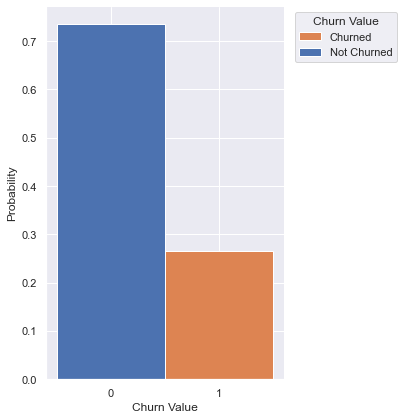

In [785]:
#plt.figure(figsize=(10,6))
#sns.histplot(df5, x='churn_value')

ax = sns.displot(data=df5, x='churn_value', stat='probability', height=6,
                 aspect=0.7, hue='churn_value', bins=2, discrete=True, legend=False, alpha=1)
ax.set(xlabel='Churn Value', ylabel='Probability')

plt.xticks([0, 1], ['0', '1'])
plt.legend(title='Churn Value', loc='upper right', bbox_to_anchor=(1.5,1), labels=['Churned', 'Not Churned'])

plt.show()

## Tenure distribution in customer churn

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


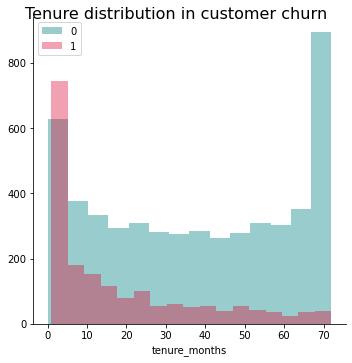

In [611]:
ax = sns.FacetGrid(df5, hue='churn_value', palette=["teal", "crimson"], size=5, aspect=1)
ax = ax.map(sns.distplot, "tenure_months",  hist=True, kde=False)
ax.fig.suptitle('Tenure distribution in customer churn', y=1, fontsize=16);
plt.legend();

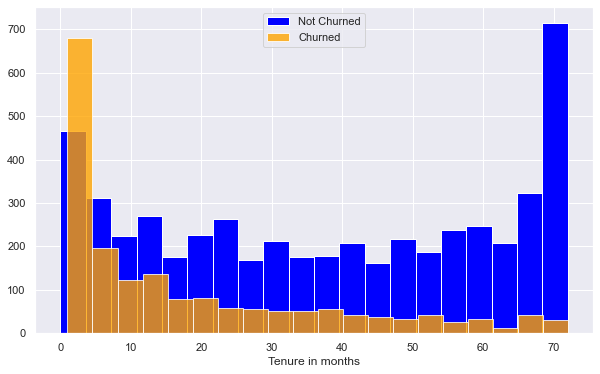

In [784]:
plt.figure(figsize=(10,6))
df5[df5['churn_value']==0]['tenure_months'].hist(bins=20, color='blue', label='Not Churned')
df5[df5['churn_value']==1]['tenure_months'].hist(bins=20, color='orange', label = 'Churned', alpha=0.8)
plt.legend()
plt.xlabel('Tenure in months')
plt.show()

## Correlations

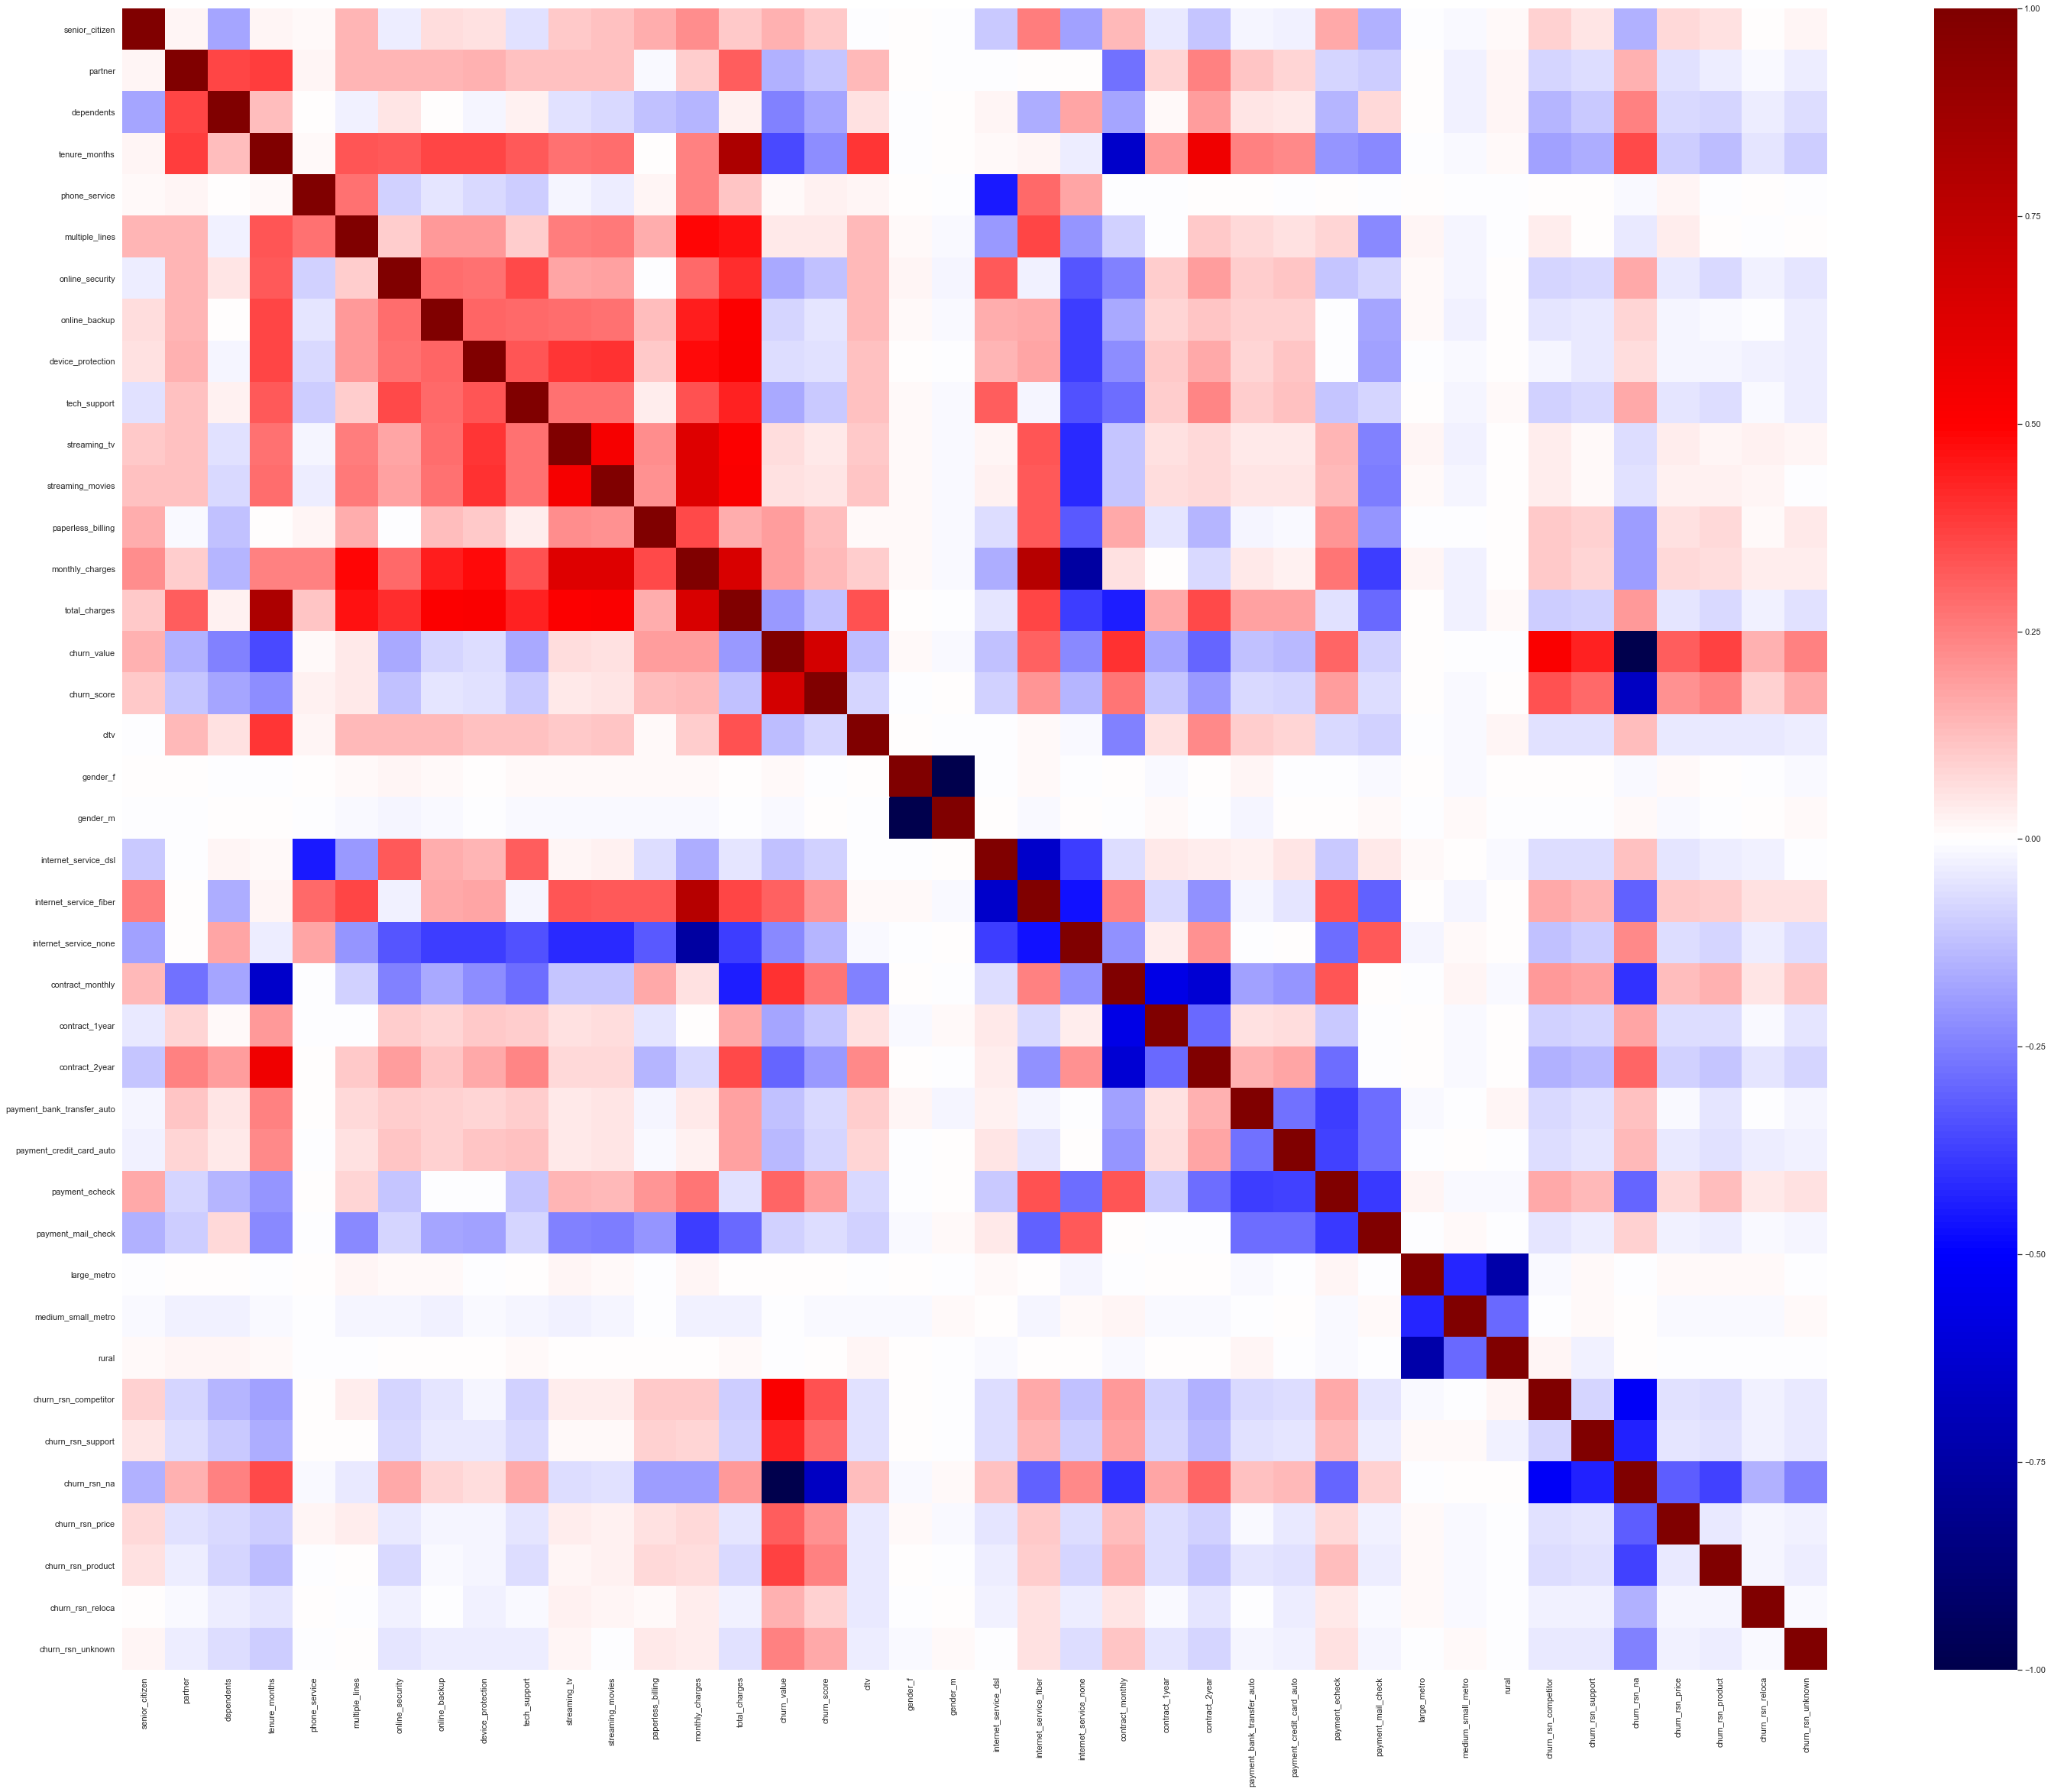

In [665]:
sns.set(rc={"figure.figsize":(50, 40)})
sns.heatmap(df5.corr(), cmap="seismic");

In [669]:
c = df5.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
so[(so > 0.8) & (so != 1)].sort_values(ascending=False)

In [671]:
so.sort_values(ascending=False)

churn_rsn_unknown   churn_rsn_unknown     1.000000
churn_rsn_reloca    churn_rsn_reloca      1.000000
partner             partner               1.000000
tenure_months       tenure_months         1.000000
phone_service       phone_service         1.000000
                                            ...   
gender_f            large_metro           0.000027
large_metro         gender_m              0.000027
gender_m            large_metro           0.000027
rural               payment_mail_check    0.000026
payment_mail_check  rural                 0.000026
Length: 1600, dtype: float64

In [871]:
so[(so > 0.8) & (so != 1)].sort_values(ascending=False)

churn_rsn_na   churn_value      1.000000
churn_value    churn_rsn_na     1.000000
gender_m       gender_f         1.000000
gender_f       gender_m         1.000000
tenure_months  total_charges    0.826178
total_charges  tenure_months    0.826178
dtype: float64

### Total charges and tenure in months might be problematic

In [873]:
df5.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv', 'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'churn_rsn_competitor',
       'churn_rsn_support', 'churn_rsn_na', 'churn_rsn_price',
       'churn_rsn_product', 'churn_rsn_reloca', 'churn_rsn_unknown'],
      dtype='object')

## Feature engineering

In [106]:
df6 = df5.copy()

In [ ]:
b

In [107]:
df6.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv', 'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'churn_rsn_competitor',
       'churn_rsn_support', 'churn_rsn_na', 'churn_rsn_price',
       'churn_rsn_product', 'churn_rsn_reloca', 'churn_rsn_unknown'],
      dtype='object')

In [108]:
def map_products(df6):
  
    prod_cols = ['p1_phone_only_core', 'p2_phone_only_prem',
                 'p3_int_only_core', 'p4_int_only_prem','p5_int_phone_bund_core',
                 'p6_int_phone_bund_prem']
    
    for newcol in prod_cols:
        df6[newcol]= 0
        
        #Phone only core
        df6.loc[(df6['phone_service']==1) & 
         (df6['internet_service_dsl']==0) & (df6['internet_service_fiber']==0) & 
         (df6['tech_support']==0) & (df6['online_backup']==0) & 
         (df6['online_security']==0) & (df6['device_protection']==0), 
         'p1_phone_only_core'] = 1
        
        #Phone only prem
        df6.loc[(df6['phone_service']==1) & 
         (df6['internet_service_dsl']==0) & (df6['internet_service_fiber']==0) & 
         ((df6['tech_support']==1) | (df6['online_backup']==1) |
         (df6['online_security']==1) | (df6['device_protection']==1)), 
         'p2_phone_only_prem'] = 1
        
        #Internet only core
        df6.loc[((df6['internet_service_dsl']==1) | (df6['internet_service_fiber']==1))
                 & (df6['phone_service']==0) & (df6['tech_support']==0) &
                 (df6['online_backup']==0) & (df6['online_security']==0) &
                 (df6['device_protection']==0),
                 'p3_int_only_core'] = 1
        
        #Internet only prem
        df6.loc[((df6['internet_service_dsl']==1) | (df6['internet_service_fiber']==1))
                 & (df6['phone_service']==0) &
                  ((df6['tech_support']==1) |
                 (df6['online_backup']==1) | (df6['online_security']==1) |
                 (df6['device_protection']==1)),
                 'p4_int_only_prem'] = 1
            
        #Int phone bundle core
        df6.loc[(df6['phone_service']==1) & 
         ((df6['internet_service_dsl']==1) | (df6['internet_service_fiber']==1)) & 
         (df6['tech_support']==0) & (df6['online_backup']==0) &
         (df6['online_security']==0) & (df6['device_protection']==0), 
         'p5_int_phone_bund_core'] = 1
        
        #Int phone bundle prem
        df6.loc[(df6['phone_service']==1) & 
         ((df6['internet_service_dsl']==1) | (df6['internet_service_fiber']==1)) & 
         ((df6['tech_support']==1) | (df6['online_backup']==1) |
         (df6['online_security']==1) | (df6['device_protection']==1)), 
         'p6_int_phone_bund_prem'] = 1

    return df6

In [109]:
map_products(df6)

senior_citizen  partner  dependents  tenure_months  phone_service  \
0                  0        0           0              2              1   
1                  0        0           1              2              1   
2                  0        0           1              8              1   
3                  0        1           1             28              1   
4                  0        0           1             49              1   
...              ...      ...         ...            ...            ...   
7038               0        0           0             72              1   
7039               0        1           1             24              1   
7040               0        1           1             72              1   
7041               0        1           1             11              0   
7042               0        0           0             66              1   

      multiple_lines  online_security  online_backup  device_protection  \
0                  0                1              1                  0   
1                  0                0              0                  0   
2                  1                0              0                  1   
3                  1                0              0                  1   
4                  1                0              1                  1   
...              ...              ...            ...                ...   
7038               0                0              0                  0   
7039               1                1              0                  1   
7040               1                0              1                  1   
7041               0                1              0                  0   
7042               0                1              0                  1   

      tech_support  streaming_tv  streaming_movies  paperless_billing  \
0                0             0                 0                  1   
1                0             0                 0                  1   
2                0             1                 1                  1   
3                1             1                 1                  1   
4                0             1                 1                  1   
...            ...           ...               ...                ...   
7038             0             0                 0                  1   
7039             1             1                 1                  1   
7040             0             1                 1                  1   
7041             0             0                 0                  1   
7042             1             1                 1                  1   

      monthly_charges  total_charges  churn_value  churn_score  cltv  \
0               53.85         108.15            1           86  3239   
1               70.70         151.65            1           67  2701   
2               99.65         820.50            1           86  5372   
3              104.80        3046.05            1           84  5003   
4              103.70        5036.30            1           89  5340   
...               ...            ...          ...          ...   ...   
7038            21.15        1419.40            0           45  5306   
7039            84.80        1990.50            0           59  2140   
7040           103.20        7362.90            0           71  5560   
7041            29.60         346.45            0           59  2793   
7042           105.65        6844.50            0           38  5097   

      gender_f  gender_m  internet_service_dsl  internet_service_fiber  \
0            0         1                     1                       0   
1            1         0                     0                       1   
2            1         0                     0                       1   
3            1         0                     0                       1   
4            0         1                     0                       1   
...        ...    

In [110]:
def add_features(df6):
    
    # create feature 0/1 whether customer streams content via internet service
    df6['streams'] = df6[['streaming_movies', 'streaming_tv']].sum(axis=1)
    
    # create feature 0/1 whether payment method is an automated method or not
    df6['pmt_meth_auto'] = df6[['payment_credit_card_auto', 
                                        'payment_bank_transfer_auto']].sum(axis=1)

    # create feature counting number of add-on services
    df6['num_add_ons'] = df6[['online_security', 'online_backup', 
                                      'device_protection', 'tech_support', 
                                      'multiple_lines']].sum(axis=1)
    
    # bin tenure into 1st year versus other longer loyalty
    df6['tenure_0-1yr'] = df6.tenure_months.apply(lambda x: 1 if x<12 else 0)
    df6['tenure_1-2yr'] = df6.tenure_months.apply(lambda x: 1 if x>=12 and x<24 else 0)
    df6['tenure_2-4yr'] = df6.tenure_months.apply(lambda x: 1 if x>=24 and 
                                                    x<48 else 0)
    df6['tenure_4+yr'] = df6.tenure_months.apply(lambda x: 1 if x>=48 else 0)

    return df6

In [111]:
add_features(df6)

senior_citizen  partner  dependents  tenure_months  phone_service  \
0                  0        0           0              2              1   
1                  0        0           1              2              1   
2                  0        0           1              8              1   
3                  0        1           1             28              1   
4                  0        0           1             49              1   
...              ...      ...         ...            ...            ...   
7038               0        0           0             72              1   
7039               0        1           1             24              1   
7040               0        1           1             72              1   
7041               0        1           1             11              0   
7042               0        0           0             66              1   

      multiple_lines  online_security  online_backup  device_protection  \
0                  0                1              1                  0   
1                  0                0              0                  0   
2                  1                0              0                  1   
3                  1                0              0                  1   
4                  1                0              1                  1   
...              ...              ...            ...                ...   
7038               0                0              0                  0   
7039               1                1              0                  1   
7040               1                0              1                  1   
7041               0                1              0                  0   
7042               0                1              0                  1   

      tech_support  streaming_tv  streaming_movies  paperless_billing  \
0                0             0                 0                  1   
1                0             0                 0                  1   
2                0             1                 1                  1   
3                1             1                 1                  1   
4                0             1                 1                  1   
...            ...           ...               ...                ...   
7038             0             0                 0                  1   
7039             1             1                 1                  1   
7040             0             1                 1                  1   
7041             0             0                 0                  1   
7042             1             1                 1                  1   

      monthly_charges  total_charges  churn_value  churn_score  cltv  \
0               53.85         108.15            1           86  3239   
1               70.70         151.65            1           67  2701   
2               99.65         820.50            1           86  5372   
3              104.80        3046.05            1           84  5003   
4              103.70        5036.30            1           89  5340   
...               ...            ...          ...          ...   ...   
7038            21.15        1419.40            0           45  5306   
7039            84.80        1990.50            0           59  2140   
7040           103.20        7362.90            0           71  5560   
7041            29.60         346.45            0           59  2793   
7042           105.65        6844.50            0           38  5097   

      gender_f  gender_m  internet_service_dsl  internet_service_fiber  \
0            0         1                     1                       0   
1            1         0                     0                       1   
2            1         0                     0                       1   
3            1         0                     0                       1   
4            0         1                     0                       1   
...        ...    

In [112]:
df6.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv', 'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'churn_rsn_competitor',
       'churn_rsn_support', 'churn_rsn_na', 'churn_rsn_price',
       'churn_rsn_product', 'churn_rsn_reloca', 'churn_rsn_unknown',
       'p1_phone_only_core', 'p2_phone_only_prem', 'p3_int_only_core',
       'p4_int_only_prem', 'p5_int_phone_bund_core', 'p6_int_phone_bund_prem',
       'streams', 'pmt_meth_auto'

In [225]:
df6.to_csv('df6.csv', index=False)

## Correlations

In [113]:
df7 = df6.copy()

In [114]:
df7 = df7.drop(['churn_score','churn_rsn_na', 'churn_rsn_competitor', 'churn_rsn_support', 'churn_rsn_price',
       'churn_rsn_product', 'churn_rsn_reloca', 'churn_rsn_unknown' ], axis=1)

## General insight

### Tenure in month vs churn

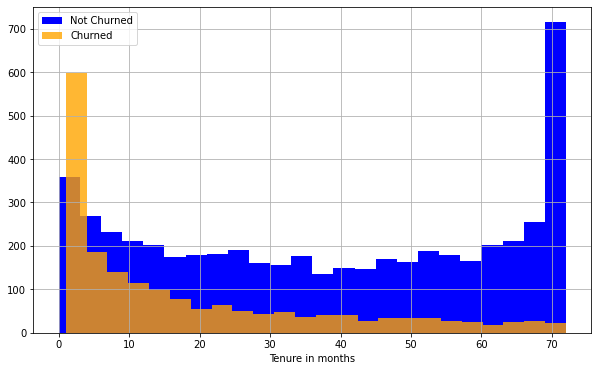

In [227]:
plt.figure(figsize=(10,6))
df7[df7['churn_value']==0]['tenure_months'].hist(bins=24, color='blue', label='Not Churned')
df7[df7['churn_value']==1]['tenure_months'].hist(bins=24, color='orange', label = 'Churned', alpha=0.8)
plt.legend()
plt.xlabel('Tenure in months')
plt.show()

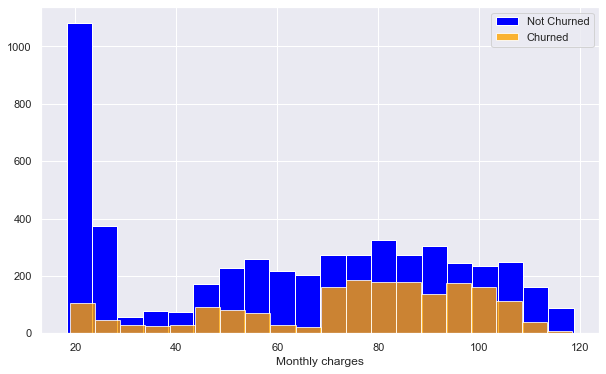

In [1049]:
plt.figure(figsize=(10,6))
df7[df7['churn_value']==0]['monthly_charges'].hist(bins=20, color='blue', label='Not Churned')
df7[df7['churn_value']==1]['monthly_charges'].hist(bins=20, color='orange', label = 'Churned', alpha=0.8)
plt.legend()
plt.xlabel('Monthly charges')
plt.show()

In [1065]:
plt.figure(figsize=(10,6))
df7[df7['churn_value']==0]['total_charges'].hist(bins=20, color='blue', label='Not Churned')
df7[df7['churn_value']==1]['total_charges'].hist(bins=20, color='orange', label = 'Churned', alpha=0.8)
plt.legend()
plt.xlabel('Total charges')
plt.show()

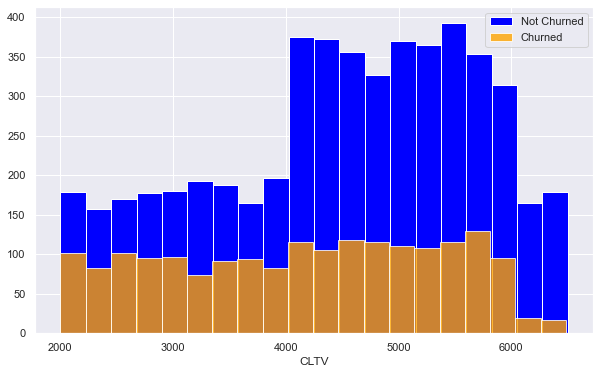

In [1066]:
plt.figure(figsize=(10,6))
df7[df7['churn_value']==0]['cltv'].hist(bins=20, color='blue', label='Not Churned')
df7[df7['churn_value']==1]['cltv'].hist(bins=20, color='orange', label = 'Churned', alpha=0.8)
plt.legend()
plt.xlabel('CLTV')
plt.show()

In [1058]:
df2.columns

Index(['customerid', 'count', 'city', 'zip_code', 'lat_long', 'gender',
       'senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv', 'churn_reason', 'county', '2013 code',
       'churn_reason_grp'],
      dtype='object')

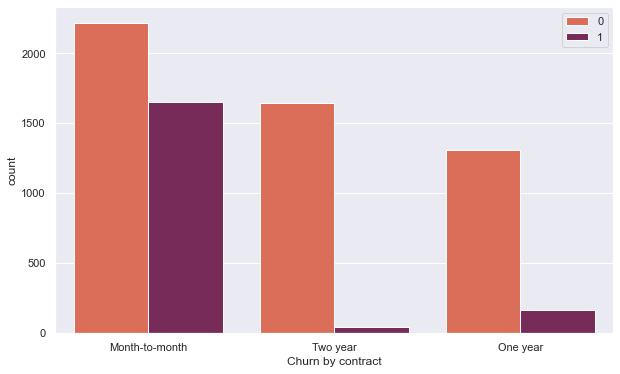

In [1064]:
plt.figure(figsize=(10,6))

sns.countplot(x='contract', hue='churn_value', data=df2, palette='rocket_r')
# df7[df7['churn_value']==1]['contract_monthly'].hist(bins=20, color='blue', label='Monthly')
# df7[df7['churn_value']==1]['contract_1year'].hist(bins=20, color='orange', label = '1 year', alpha=0.8)
# df7[df7['churn_value']==1]['contract_2year'].hist(bins=20, color='green', label = '2 year', alpha=0.8)

plt.legend()
plt.xlabel('Churn by contract')
plt.show()

No handles with labels found to put in legend.


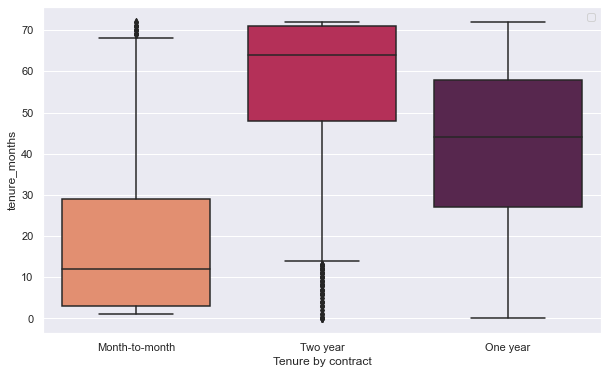

In [1122]:
plt.figure(figsize=(10,6))
sns.boxplot(x='contract', y='tenure_months', data=df2, palette='rocket_r')
# df7[df7['churn_value']==1]['contract_monthly'].hist(bins=20, color='blue', label='Monthly')
# df7[df7['churn_value']==1]['contract_1year'].hist(bins=20, color='orange', label = '1 year', alpha=0.8)
# df7[df7['churn_value']==1]['contract_2year'].hist(bins=20, color='green', label = '2 year', alpha=0.8)

plt.legend()
plt.xlabel('Tenure by contract')
plt.show()

In [1143]:
tenure_churned = df2[df2['churn_value']==1]

plt.figure(figsize=(10,6))
sns.boxplot(x='contract', y='tenure_months', data=tenure_churned, palette='rocket_r')

plt.legend()
plt.xlabel('Churned tenure by contract')
plt.show()

print(tenure_churned.groupby('contract')['tenure_months'].median())
print(tenure_churned.groupby('contract')['tenure_months'].max())

No handles with labels found to put in legend.


contract
Month-to-month     7.0
One year          48.0
Two year          65.5
Name: tenure_months, dtype: float64
contract
Month-to-month    71
One year          72
Two year          72
Name: tenure_months, dtype: int64


In [1142]:
#lifetime value per contract
plt.figure(figsize=(10,6))

sns.barplot(y='cltv', x='contract', data=df2, palette='rocket_r')
# df7[df7['churn_value']==1]['contract_monthly'].hist(bins=20, color='blue', label='Monthly')
# df7[df7['churn_value']==1]['contract_1year'].hist(bins=20, color='orange', label = '1 year', alpha=0.8)
# df7[df7['churn_value']==1]['contract_2year'].hist(bins=20, color='green', label = '2 year', alpha=0.8)

plt.legend()
plt.xlabel('Lifetime value per contract')
plt.show()

No handles with labels found to put in legend.


In [1135]:
average_cltv

contract
Month-to-month    4136.708387
One year          4529.955872
Two year          4890.214159
Name: cltv, dtype: float64

In [ ]:
plt.figure(figsize=(10,6))
df7[df7['churn_value']==0]['tenure_4+yr'].hist(bins=20, color='blue', label='Not Churned')
df7[df7['churn_value']==1]['cltv'].hist(bins=20, color='orange', label = 'Churned', alpha=0.8)
plt.legend()
plt.xlabel('CLTV')
plt.show()

## Fitting base model - Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
df7.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn_value',
       'cltv', 'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'p1_phone_only_core',
       'p2_phone_only_prem', 'p3_int_only_core', 'p4_int_only_prem',
       'p5_int_phone_bund_core', 'p6_int_phone_bund_prem', 'streams',
       'pmt_meth_auto', 'num_add_ons', 'tenure_0-1yr', 'tenure_1-2yr',
       'tenure_2-4yr', 'tenure_4+yr'],
      dtype='object')

In [117]:
X = df7.drop('churn_value', axis=1)
y = df7['churn_value']

In [118]:
X.shape

(7043, 44)

In [119]:
X.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'cltv',
       'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'p1_phone_only_core',
       'p2_phone_only_prem', 'p3_int_only_core', 'p4_int_only_prem',
       'p5_int_phone_bund_core', 'p6_int_phone_bund_prem', 'streams',
       'pmt_meth_auto', 'num_add_ons', 'tenure_0-1yr', 'tenure_1-2yr',
       'tenure_2-4yr', 'tenure_4+yr'],
      dtype='object')

In [632]:
# def model_fit(classifier, X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#     model = classifier
#     model.fit(X_train, y_train)
#     print('Train score ', model.score(X_train, y_train))
#     prediction = model.predict(X_test)
#     print(confusion_matrix(y_test, prediction))
#     print(classification_report(y_test, prediction))
#     importances = model.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
#     return importances, std
    

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [122]:
df7['streams'].unique()

array([0, 2, 1])

In [ ]:
df7['num_add_ons'].unique()

In [123]:
#numerical data
num_columns = ['tenure_months', 'monthly_charges', 'total_charges', 'cltv']

In [1082]:
X_train.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'cltv',
       'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'streams',
       'pmt_meth_auto', 'num_add_ons', 'tenure_0-1yr', 'tenure_1-2yr',
       'tenure_2-4yr', 'tenure_4+yr', 'p1_phone_only_core',
       'p2_phone_only_prem', 'p3_int_only_core', 'p4_int_only_prem',
       'p5_int_phone_bund_core', 'p6_int_phone_bund_prem'],
      dtype='object')

In [124]:
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()

In [125]:
scaler = StandardScaler().fit(X_train_2[['tenure_months', 'monthly_charges', 'total_charges', 'cltv']])

X_train_2[['tenure_months', 'monthly_charges', 'total_charges', 'cltv']] = scaler.transform(X_train_2[['tenure_months', 'monthly_charges', 'total_charges', 'cltv']])
X_test_2[['tenure_months', 'monthly_charges', 'total_charges', 'cltv']] = scaler.transform(X_test_2[['tenure_months', 'monthly_charges', 'total_charges', 'cltv']])


In [126]:
X_test_2.shape

(2113, 44)

In [1086]:
X_train_2.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'cltv',
       'gender_f', 'gender_m', 'internet_service_dsl',
       'internet_service_fiber', 'internet_service_none', 'contract_monthly',
       'contract_1year', 'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'streams',
       'pmt_meth_auto', 'num_add_ons', 'tenure_0-1yr', 'tenure_1-2yr',
       'tenure_2-4yr', 'tenure_4+yr', 'p1_phone_only_core',
       'p2_phone_only_prem', 'p3_int_only_core', 'p4_int_only_prem',
       'p5_int_phone_bund_core', 'p6_int_phone_bund_prem'],
      dtype='object')

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_2, y_train)
print('Accuracy score train', forest.score(X_train_2, y_train))
y_pred = forest.predict(X_test_2)

print('Accuracy score test', forest.score(X_test_2, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy score train 1.0
Accuracy score test 0.7898722195929957
[[1377  152]
 [ 292  292]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1529
           1       0.66      0.50      0.57       584

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



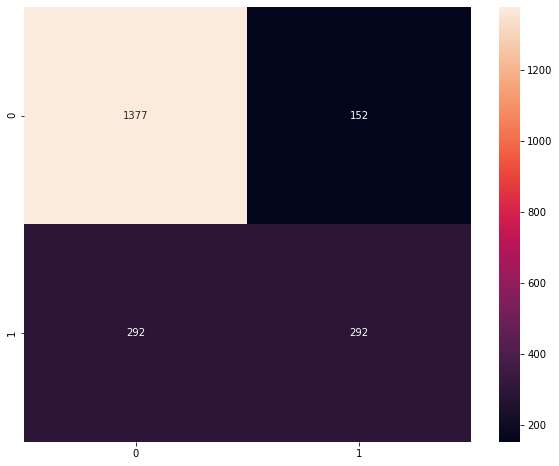

In [129]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [130]:
from sklearn.metrics import f1_score, roc_auc_score

## INITIAL RANDOM FOREST

In [131]:
print('Initial Random Forest; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, y_pred), roc_auc_score(y_test, forest.predict_proba(X_test_2)[:,1])))

Initial Random Forest; Test F1: 0.568, Test AUC: 0.838


In [132]:
feature_importances_forest = pd.DataFrame(forest.feature_importances_, index=X_train.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)

In [133]:
feature_importances_forest

importance
total_charges                 0.114576
monthly_charges               0.106726
tenure_months                 0.106185
cltv                          0.097464
contract_monthly              0.047679
internet_service_fiber        0.040628
payment_echeck                0.030207
num_add_ons                   0.027506
dependents                    0.027441
tenure_0-1yr                  0.023132
p5_int_phone_bund_core        0.020365
paperless_billing             0.019911
partner                       0.018161
large_metro                   0.016850
streams                       0.016273
rural                         0.015826
senior_citizen                0.015310
gender_m                      0.014819
gender_f                      0.014194
contract_2year                0.013675
online_security               0.013405
multiple_lines                0.013320
tenure_4+yr                   0.013050
tech_support                  0.012925
online_backup                 0.011396
medium_small_metro            0.011357
device_protection             0.011343
streaming_movies              0.011075
pmt_meth_auto                 0.011053
streaming_tv                  0.010975
internet_service_dsl          0.010541
internet_service_none         0.009536
contract_1year                0.009513
p1_phone_only_core            0.009368
payment_mail_check            0.008368
payment_bank_transfer_auto    0.008281
payment_credit_card_auto      0.008168
p6_int_phone_bund_prem        0.007013
tenure_2-4yr                  0.006982
tenure_1-2yr                  0.006621
phone_service                 0.003532
p3_int_only_core              0.002712
p4_int_only_prem              0.002538
p2_phone_only_prem            0.000000

In [134]:
feature_importances_forest.tail(10)

importance
payment_mail_check            0.008368
payment_bank_transfer_auto    0.008281
payment_credit_card_auto      0.008168
p6_int_phone_bund_prem        0.007013
tenure_2-4yr                  0.006982
tenure_1-2yr                  0.006621
phone_service                 0.003532
p3_int_only_core              0.002712
p4_int_only_prem              0.002538
p2_phone_only_prem            0.000000

Text(0.5, 0, 'Random Forest Feature Importance')

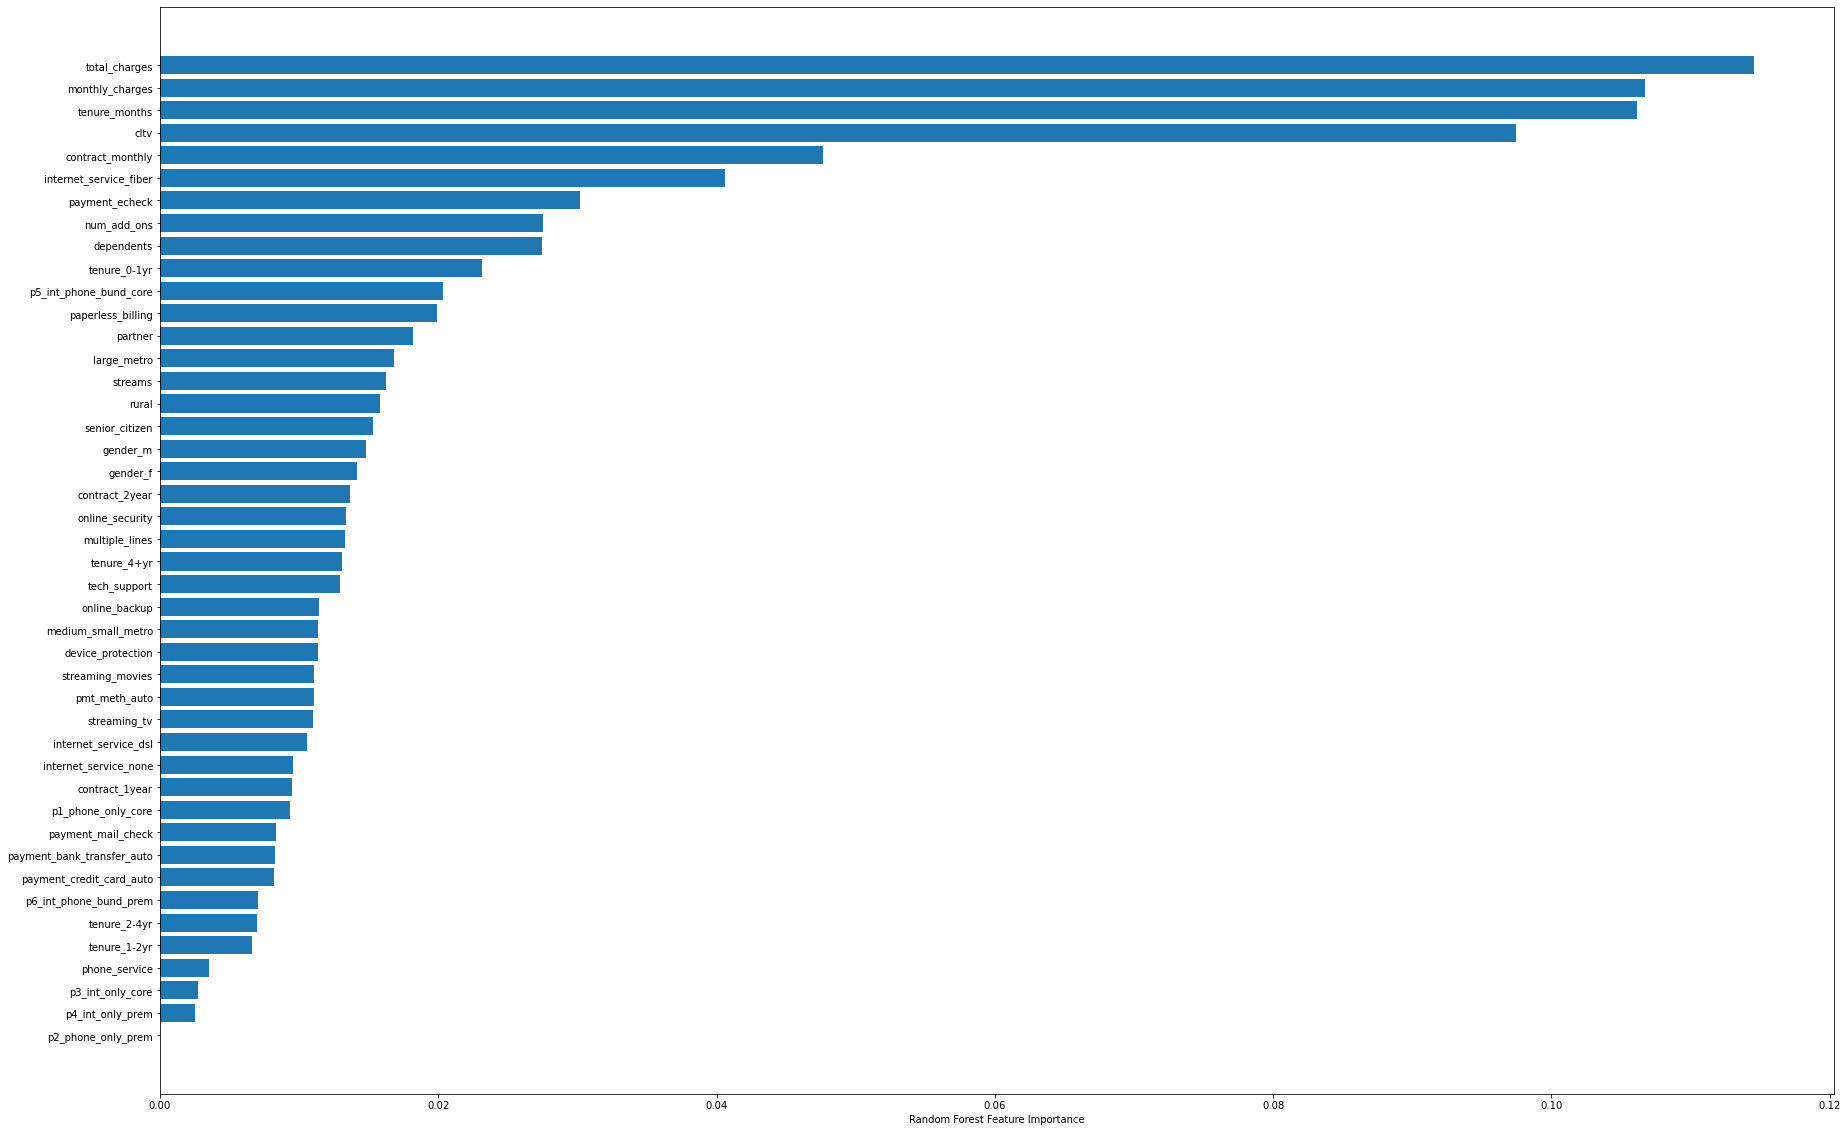

In [135]:
plt.figure(figsize=(30,20))

sorted_idx = forest.feature_importances_.argsort()
plt.barh(X_train_2.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")



## Feature reduction

In [ ]:
#MOST IMPORTANT FEATURES: are total_charges, monthly_charges, tenure in months,
#cltv abd contract monthly.

#Let's address correlation of 0.80+

#-> Streaming movies or tv is less important than just identifying if they use
#their internet to stream media in general - KEEP STREAM, DELETE MOTIES/TV

#---> Tenure in months: seems that the only category from the engineered
#features that is of importance is if they have been with the company under a year.
#all others we will drop.

#Separation between phone and internet in terms of product bundle is not contributing much.
#Add ons in general are contributing, as well as having mult line for phone.
#We will remove int and phone only categories, but keep phone and int bundles. 



In [136]:
c_2 = df7.corr().unstack()
c_2.drop_duplicates(inplace=True)
c_2[abs(c_2)>0.8].sort_values(ascending=False)
# #sort_values(kind="quicksort")

# s_2[abs(s_2 > 0.6) & (s_2 != 1)].sort_values(ascending=False)

senior_citizen    senior_citizen      1.000000
streaming_movies  streams             0.875754
streaming_tv      streams             0.875299
tenure_months     tenure_4+yr         0.858873
                  total_charges       0.826178
phone_service     p4_int_only_prem   -0.889728
gender_f          gender_m           -1.000000
dtype: float64

In [ ]:
#Streaming movies vs TV --> low importance, but Streams is mediumb importance
#--> since they are highly correlated, I'm removing the two options and just keeping Streams.
#The company does not charge any additional fee for the service.



In [ ]:
#GOING TO TEST OUR BASELINE ON THE FEWER FEATURES.


In [137]:
X_train_3 = X_train_2.drop(['streaming_movies', 'streaming_tv', 'tenure_4+yr', 'tenure_1-2yr', 'tenure_2-4yr',
'p1_phone_only_core', 'p3_int_only_core','p4_int_only_prem','p2_phone_only_prem'], axis=1)

In [138]:
X_test_3 = X_test_2.drop(['streaming_movies', 'streaming_tv', 'tenure_4+yr', 'tenure_1-2yr', 'tenure_2-4yr',
'p1_phone_only_core', 'p3_int_only_core','p4_int_only_prem','p2_phone_only_prem'], axis=1)

In [139]:
X_train_3.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'paperless_billing',
       'monthly_charges', 'total_charges', 'cltv', 'gender_f', 'gender_m',
       'internet_service_dsl', 'internet_service_fiber',
       'internet_service_none', 'contract_monthly', 'contract_1year',
       'contract_2year', 'payment_bank_transfer_auto',
       'payment_credit_card_auto', 'payment_echeck', 'payment_mail_check',
       'large_metro', 'medium_small_metro', 'rural', 'p5_int_phone_bund_core',
       'p6_int_phone_bund_prem', 'streams', 'pmt_meth_auto', 'num_add_ons',
       'tenure_0-1yr'],
      dtype='object')

In [141]:
forest.fit(X_train_3, y_train)
print('Accuracy score train', forest.score(X_train_3, y_train))
y_pred_2 = forest.predict(X_test_3)

print('Accuracy score test', forest.score(X_test_3, y_test))
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))



Accuracy score train 1.0
Accuracy score test 0.7875059157595835
[[1376  153]
 [ 296  288]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1529
           1       0.65      0.49      0.56       584

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



Text(0.5, 0, 'Random Forest 2 Feature Importance')

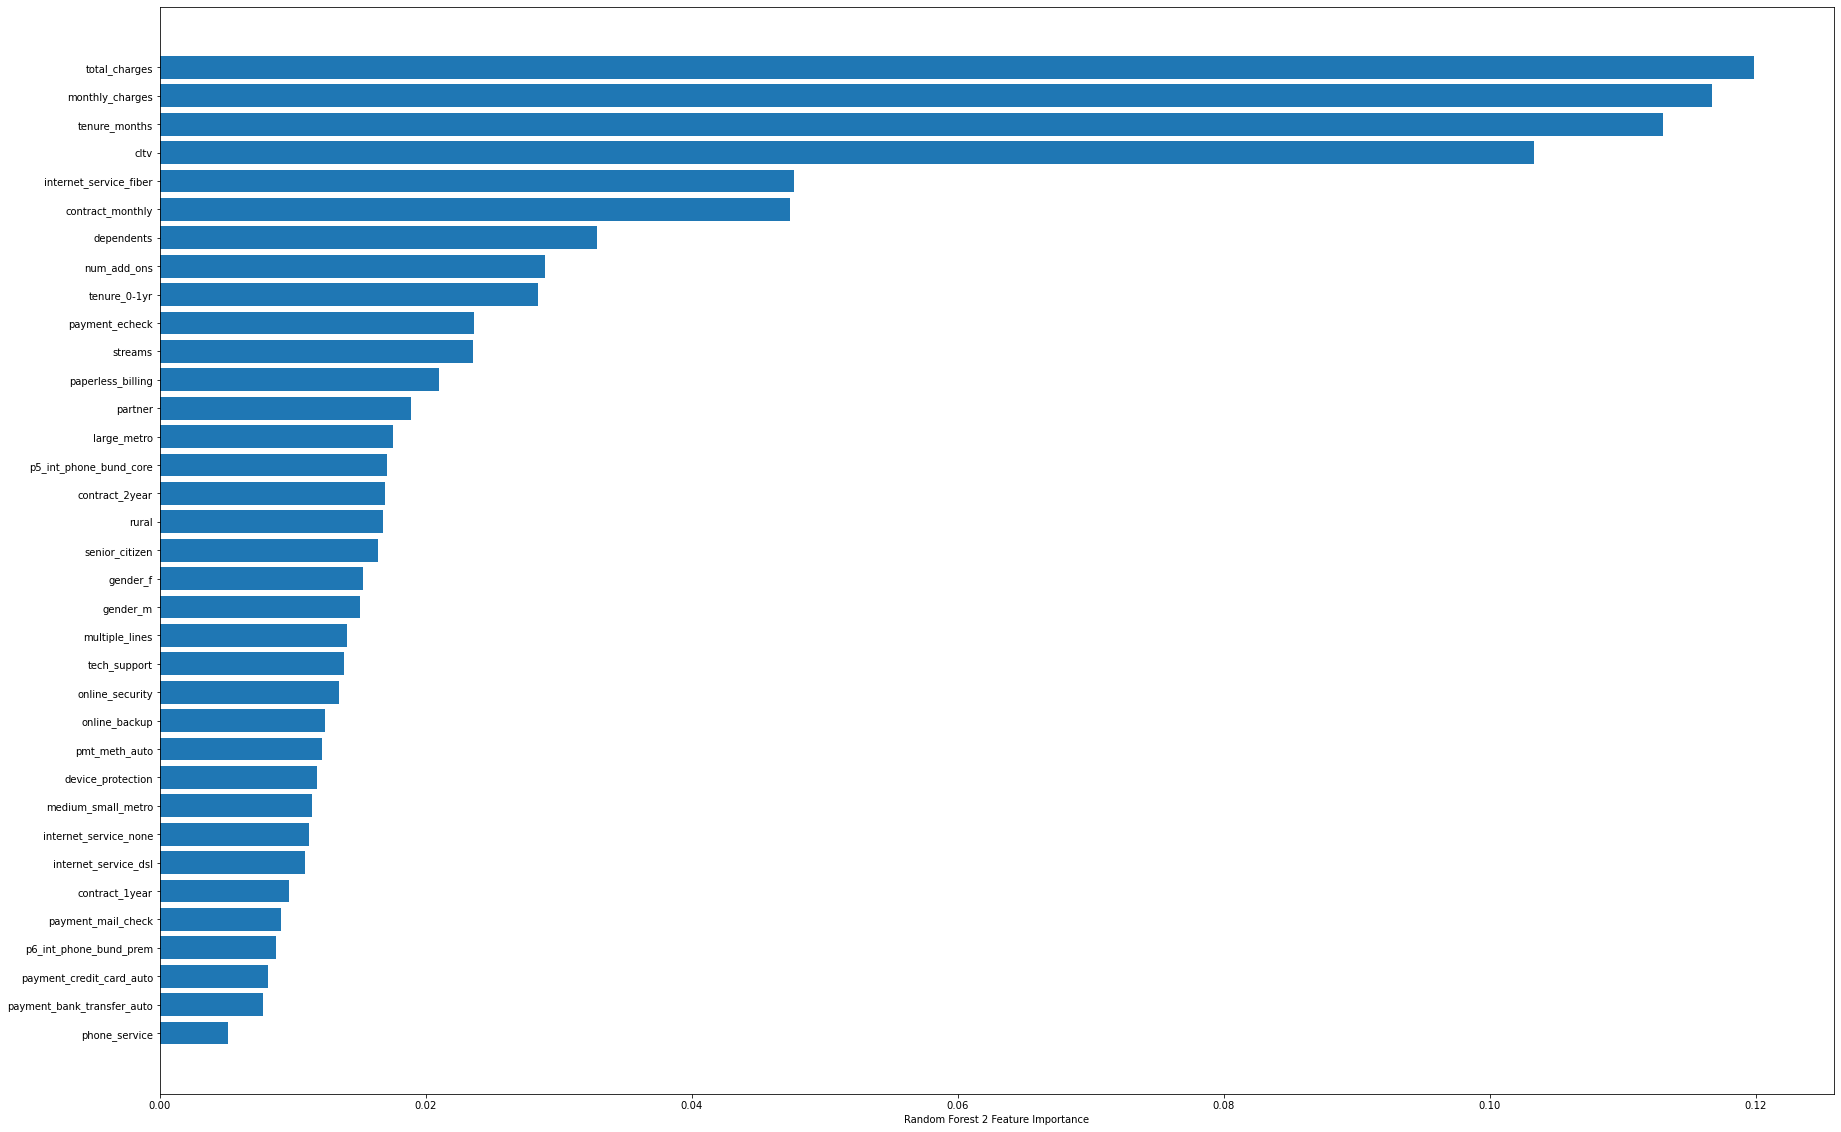

In [142]:
plt.figure(figsize=(30,20))

sorted_idx = forest.feature_importances_.argsort()
plt.barh(X_train_3.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest 2 Feature Importance")

## FUNCTIONS

In [143]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_recall_curve, classification_report
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score


In [144]:
# function to create standard gridsearchCV object
def instantiate_grid(model, grid_params, refit='roc_auc'):
 
    # set common scoring metrics for use across models
    scoring = {'roc_auc': make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=False), 
               'accuracy': make_scorer(accuracy_score), 
               'precision': make_scorer(precision_score), 
               'recall': make_scorer(recall_score), 
               'f1': make_scorer(f1_score)
              }
    
    # GridSearch uses 5 cross-validation folds within each training iteration
    gs = GridSearchCV(estimator=model, param_grid=grid_params, 
                      scoring=scoring, refit=refit, 
                      cv=StratifiedKFold(n_splits=5, 
                                     shuffle=True))
    
    return gs

In [145]:
# calculates model evaluation metrics by comparing predictions to "true north"
def score_pred(model_type, data_type, y_true, y_hat):
    scores = {}
    scores['model'] = model_type
    scores['data'] = data_type
    scores['auc'] = roc_auc_score(y_true, y_hat)
    scores['acc'] = accuracy_score(y_true, y_hat)
    scores['rec'] = recall_score(y_true, y_hat)
    scores['prec'] = precision_score(y_true, y_hat)
    scores['f1'] = f1_score(y_true, y_hat)   
    print(f'Model {scores["model"]} Predictions: AUC {round(scores["auc"], 2)} | '
          f'Accuracy {round(scores["acc"], 2)} | '
          f'Recall {round(scores["rec"], 2)} | '
          f'Precision {round(scores["prec"], 2)} | '
          f'F1 {round(scores["f1"], 2)}' )

    return scores

In [5]:
#optimize class weights

def model_weights(model, X_train, y_train, X_test, y_test):
    
    model_1 = model()
    model_balanced = model(class_weight='balanced')
    model_x = model(class_weight = {1 : 3, 0 : 1})

    model_1.fit(X_train, y_train)
    print(f'Normal {model_1} Test F1: %.3f, Test AUC: %.3f' % \
    (f1_score(y_test, model_1.predict(X_test)), roc_auc_score(y_test, model_1.predict_proba(X_test)[:,1])))

    model_balanced.fit(X_train, y_train)
    print(f'Balanced {model_balanced} Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, model_balanced.predict(X_test)), roc_auc_score(y_test, model_balanced.predict_proba(X_test)[:,1])))

    model_x.fit(X_train, y_train)
    print(f'3:1 class weights {model_x} Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, model_x.predict(X_test)), roc_auc_score(y_test, model_x.predict_proba(X_test)[:,1])))

In [180]:
def decision_thresh(model, X_test, y_test):
    X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

    thresh_ps = np.linspace(.10,.50,1000)
    model_val_probs = model.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

    f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(y_val, model_val_labels))    
        prec_scores.append(precision_score(y_val, model_val_labels))
        rec_scores.append(recall_score(y_val, model_val_labels))
        acc_scores.append(accuracy_score(y_val, model_val_labels))
    
    plt.plot(thresh_ps, f1_scores)
    plt.plot(thresh_ps, prec_scores)
    plt.plot(thresh_ps, rec_scores)
    plt.plot(thresh_ps, acc_scores)

    plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
    plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
    plt.xlabel('P threshold')
    plt.ylabel('Metric score')

    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]

    print('Model best F1 score %.3f at prob decision threshold >= %.3f' 
          % (best_f1_score, best_thresh_p))

In [147]:
def eval_metrics(model, X_test, y_test, y_pred):
    #confusion matrix
    
    print('Accuracy score test', model.score(X_test, y_test))
    c_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(dpi=150)
    sns.heatmap(c_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model} confusion matrix')
    plt.show()
    
    print(classification_report(y_test, y_pred))

In [148]:
def feature_importance(model, X_df):
_table (DataFrame): coefficient table by feature 
    # create feature coefficient dataframe
    coef_table = pd.DataFrame(X_df.columns, columns=['feature'])
    coef_table.insert(1, 'coef', model.coef_.transpose())

    # plot feature coefficient on bar graph
    fig = plt.figure(figsize=(18, 8))
    sns.barplot(x='feature', y='coef', data=coef_table, palette='vlag')
    plt.title('Model Coefficients by Feature', size=20)
    plt.xlabel('Feature', size=16)
    plt.ylabel('Model Coefficient', size=16)
    plt.xticks(rotation=-80)
    plt.tight_layout()
    plt.show()
    
    return coef_table

In [149]:
def plot_roc_curve(fpr, tpr, label=None):

    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [1197]:
model_weights(RandomForestClassifier, X_train_3, y_train, X_test_3, y_test)

Normal RandomForestClassifier() Test F1: 0.576, Test AUC: 0.844
Balanced RandomForestClassifier(class_weight='balanced') Test F1: 0.579, Test AUC: 0.841
3:1 class weights RandomForestClassifier(class_weight={0: 1, 1: 3}) Test F1: 0.590, Test AUC: 0.847


## Logistic regression

In [184]:
# create Logistic Regression classifier object
lr_model = LogisticRegression(max_iter=500)

In [185]:
# define the grid for Logistic Regression
c_params = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

grid_params_lr = [{'C' : c_params, 'solver' : ['liblinear', 'saga'], 
                   'penalty': ['l1', 'l2'], 
                   'class_weight' : [None, 'balanced', 
                                         {1:2, 0:1}, {1:3, 0:1}, {1:5, 0:1}]}]

In [186]:
# create gridsearchCV object for Logistic Regression
gs_lr = instantiate_grid(lr_model, grid_params_lr)

In [187]:
#DROPPING DUMMIES
X_train_lr = X_train_3.drop(columns=['gender_f', 'internet_service_none', 'payment_credit_card_auto',
'medium_small_metro', 'contract_1year'])

In [188]:
X_test_lr = X_test_3.drop(columns=['gender_f', 'internet_service_none', 'payment_credit_card_auto',
'medium_small_metro', 'contract_1year'])

In [193]:
# execute the Logistic Regression gridsearchCV on training data
gs_lr.fit(X_train_lr, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: Convergenc

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: Convergenc

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=500),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                           {0: 1, 1: 3}, {0: 1, 1: 5}],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)})

Logistic Regression Confusion Matrix - Training Data
Best Model Parameters: 26 <bound method BaseEstimator.get_params of LogisticRegression(C=0.01, class_weight='balanced', max_iter=500,
                   solver='liblinear')>


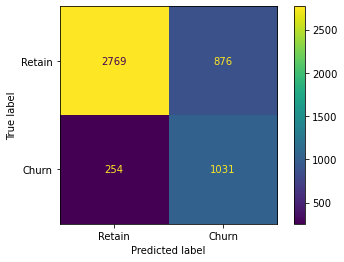

In [194]:
# print confusion matrix (train) for best model
best_model_lr = gs_lr.best_estimator_
print('Logistic Regression Confusion Matrix - Training Data')
plot_confusion_matrix(best_model_lr, X_train_lr, y_train, display_labels=['Retain', 'Churn'])
print(f'Best Model Parameters: {gs_lr.best_index_} {gs_lr.best_estimator_.get_params}')

In [191]:
# plot Random Forest feature importance for best estimator
feature_importance(best_model_lr, X_train_lr)

feature      coef
0               senior_citizen  0.141999
1                      partner  0.034747
2                   dependents -0.737939
3                tenure_months -0.536143
4                phone_service -0.421694
5               multiple_lines  0.168763
6              online_security -0.190351
7                online_backup  0.021393
8            device_protection  0.014593
9                 tech_support -0.156613
10           paperless_billing  0.225204
11             monthly_charges  0.618137
12               total_charges -0.053508
13                        cltv -0.041072
14                    gender_m -0.056602
15        internet_service_dsl  0.005908
16      internet_service_fiber  0.310773
17            contract_monthly  0.493617
18              contract_2year -0.406662
19  payment_bank_transfer_auto -0.016759
20              payment_echeck  0.194440
21          payment_mail_check -0.168205
22                 large_metro  0.006138
23                       rural -0.016220
24      p5_int_phone_bund_core  0.162263
25      p6_int_phone_bund_prem -0.090307
26                     streams  0.042976
27               pmt_meth_auto -0.203206
28                 num_add_ons -0.142215
29                tenure_0-1yr  0.332258

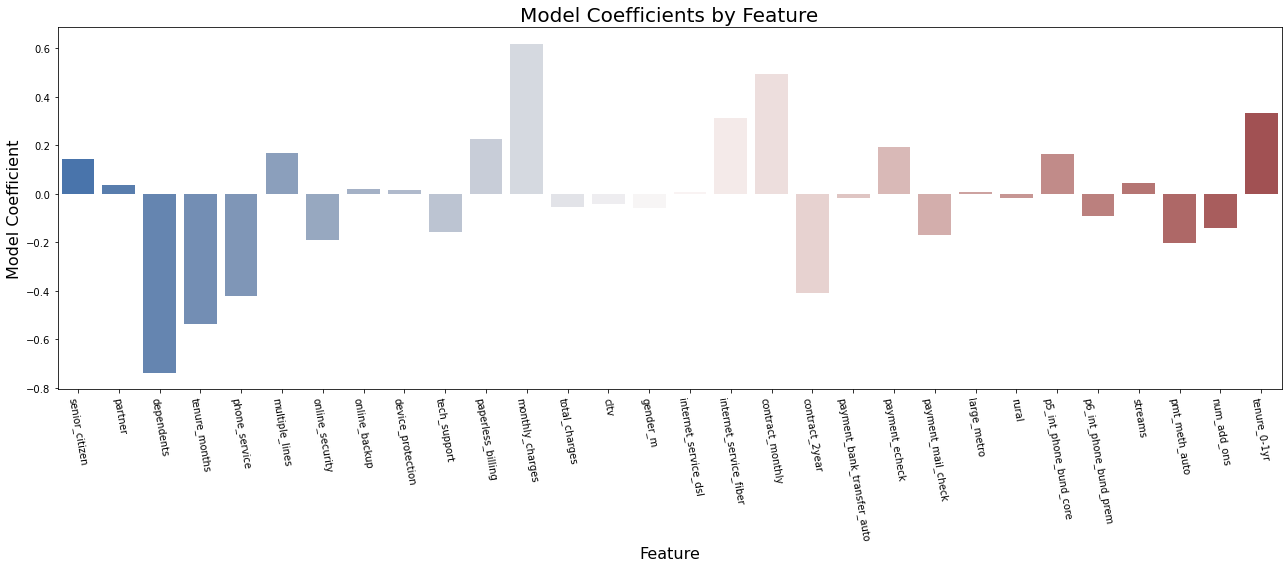

TypeError: sort_values() missing 1 required positional argument: 'by'

In [196]:
lr_features = feature_importance(best_model_lr, X_train_lr)
lr_features.sort_values()

In [192]:
# compare Logistic Regression best estimator metrics for Train vs Test data sets
print('Train Performance - Logistic Regression\n---------------------------------')
y_hat_train2 = gs_lr.predict(X_train_lr)
scores_train_lr = score_pred('lr', 'train', y_train, y_hat_train2)

print('\nTest Performance - Logistic Regression\n--------------------------------')
y_hat_test2 = gs_lr.predict(X_test_lr)
scores_test_lr = score_pred('lr', 'test', y_test, y_hat_test2)

Train Performance - Logistic Regression
---------------------------------
Model lr Predictions: AUC 0.78 | Accuracy 0.77 | Recall 0.8 | Precision 0.54 | F1 0.65

Test Performance - Logistic Regression
--------------------------------
Model lr Predictions: AUC 0.76 | Accuracy 0.75 | Recall 0.78 | Precision 0.53 | F1 0.63


Logistic Regression Confusion Matrix - Test Data - Best Model 92
Accuracy score test 0.7534311405584477


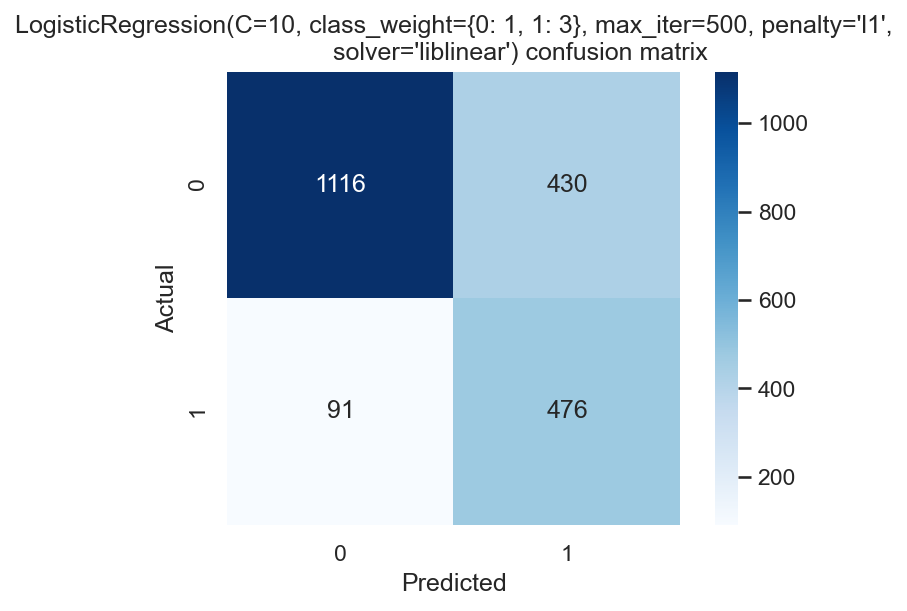

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1546
           1       0.53      0.84      0.65       567

    accuracy                           0.75      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.82      0.75      0.77      2113



In [1339]:
# print confusion matrix for best Logistic Regression model on test data
best_model_lr = gs_lr.best_estimator_
print(f'Logistic Regression Confusion Matrix - Test Data - Best Model {gs_lr.best_index_}')

eval_metrics(best_model_lr, X_test_lr, y_test, y_hat_test2)
# plot_confusion_matrix(best_model_lr, X_test_3, y_test, display_labels=['Retain', 'Churn'])

# display_class_report(y_test, y_hat_test2)

Model best F1 score 0.649 at prob decision threshold >= 0.498


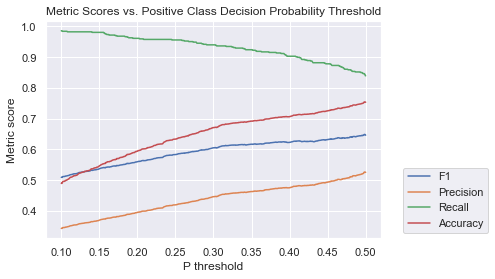

In [1340]:
decision_thresh(best_model_lr, X_test_lr, y_test)

In [1341]:
lr_dt = 0.498

lr_predicted_proba = best_model_lr.predict_proba(X_test_lr)
lr_pred = (lr_predicted_proba [:,1] >= lr_dt).astype('int')

print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
score_pred('Logistic Regression', 'test', y_test, lr_pred)

[[1111  435]
 [  87  480]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1546
           1       0.52      0.85      0.65       567

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.77      2113

Model Logistic Regression Predictions: AUC 0.78 | Accuracy 0.75 | Recall 0.85 | Precision 0.52 | F1 0.65


{'model': 'Logistic Regression',
 'data': 'test',
 'auc': 0.7825947829181983,
 'acc': 0.7529578797917653,
 'rec': 0.8465608465608465,
 'prec': 0.5245901639344263,
 'f1': 0.6477732793522267}

Logistic Regression Model AUC 0.783


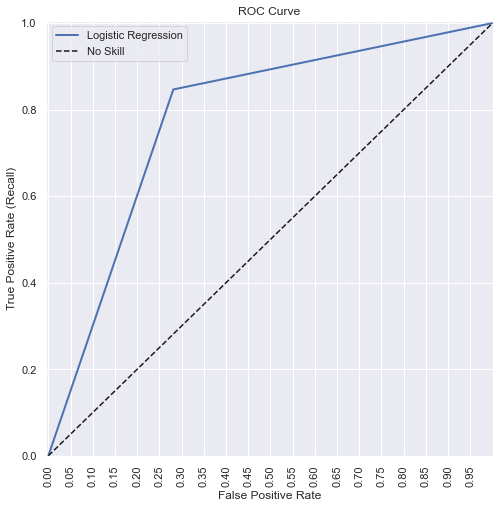

In [1342]:
# plot the ROC Area Under Curve for Logistic Regression
fpr2, tpr2, auc_thresholds2 = roc_curve(y_test, lr_pred)
print(f'Logistic Regression Model AUC {round(auc(fpr2, tpr2), 3)}') # AUC of ROC
plot_roc_curve(fpr2, tpr2, 'Logistic Regression')

In [ ]:
#shap values
ct.fit(X)
X_shap = ct.fit_transform(X)
test_shap  = ct.transform(test)
explainer = shap.LinearExplainer(logr_pipe.named_steps['LR'], X_shap, feature_perturbation="interventional")
shap_values = explainer.shap_values(test_shap)

## Random Forest Optimized

In [1343]:
model_rf = RandomForestClassifier()

In [1350]:
grid_params_rf = [{#'criterion': ['gini', 'entropy'], # measures split quality
                   'class_weight' : [None, 'balanced', 
                                         {1:2, 0:1}, {1:3, 0:1}, {1:5, 0:1}], # adjust imbalanced positive class
                   'n_estimators': [100, 200, 500], # number trees to grow            
                   #'max_features': ['auto', 6], # features considered at splits
                   'max_depth': [4, 8, 10],  # max nodes in each tree
                   #'min_samples_leaf': [5, 10, 15], # samples required in each leaf
                   'min_samples_split': [0.1, 0.2, 0.3], # percentage required to split node
                    }]

In [1351]:
# create gridsearchCV object for Random Forest
gs_rf = instantiate_grid(model_rf, grid_params_rf)

In [1352]:
gs_rf.fit(X_train_3, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                           {0: 1, 1: 3}, {0: 1, 1: 5}],
                          'max_depth': [4, 8, 10],
                          'min_samples_split': [0.1, 0.2, 0.3],
                          'n_estimators': [100, 200, 500]}],
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)})

In [166]:
from sklearn.metrics import plot_confusion_matrix

Random Forest Confusion Matrix - Training Data
Best Model Parameters: 100 <bound method BaseEstimator.get_params of RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_split=0.1, n_estimators=200)>


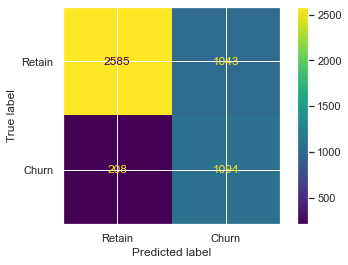

In [1353]:
# print confusion matrix (train) for best model
best_model_rf = gs_rf.best_estimator_
print('Random Forest Confusion Matrix - Training Data')

plot_confusion_matrix(best_model_rf, X_train_3, y_train, display_labels=['Retain', 'Churn'])
print(f'Best Model Parameters: {gs_rf.best_index_} {gs_rf.best_estimator_.get_params}')


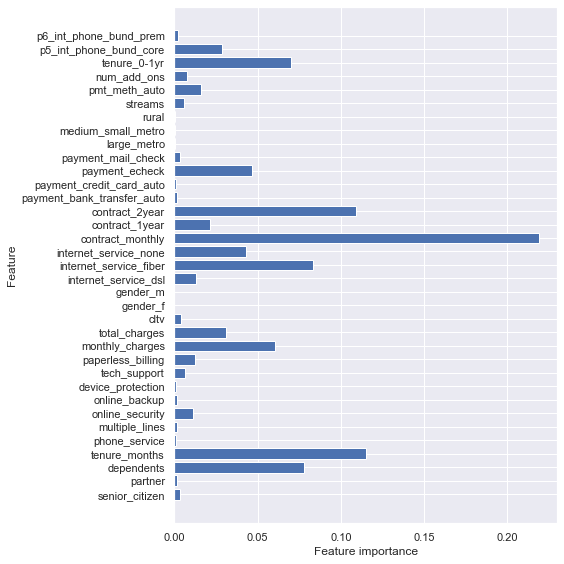

In [1354]:
# plot Random Forest feature importance for best estimator
n_features = X_train_3.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), best_model_rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train_3.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [1355]:
# compare random forest best estimator metrics for Train vs Test data sets
print('Train Performance - Random Forest\n---------------------------------')
y_hat_train3 = gs_rf.predict(X_train_3)
scores_train_rf = score_pred('rf', 'train', y_train, y_hat_train3)

print('\nTest Performance - Random Forest\n--------------------------------')
y_hat_test3 = gs_rf.predict(X_test_3)
scores_test_rf = score_pred('rf', 'test', y_test, y_hat_test3)

Train Performance - Random Forest
---------------------------------
Model rf Predictions: AUC 0.78 | Accuracy 0.75 | Recall 0.84 | Precision 0.51 | F1 0.64

Test Performance - Random Forest
--------------------------------
Model rf Predictions: AUC 0.77 | Accuracy 0.74 | Recall 0.85 | Precision 0.51 | F1 0.64


Random Forest Confusion Matrix - Test Data - Best Model 100
Accuracy score test 0.7401798390913393


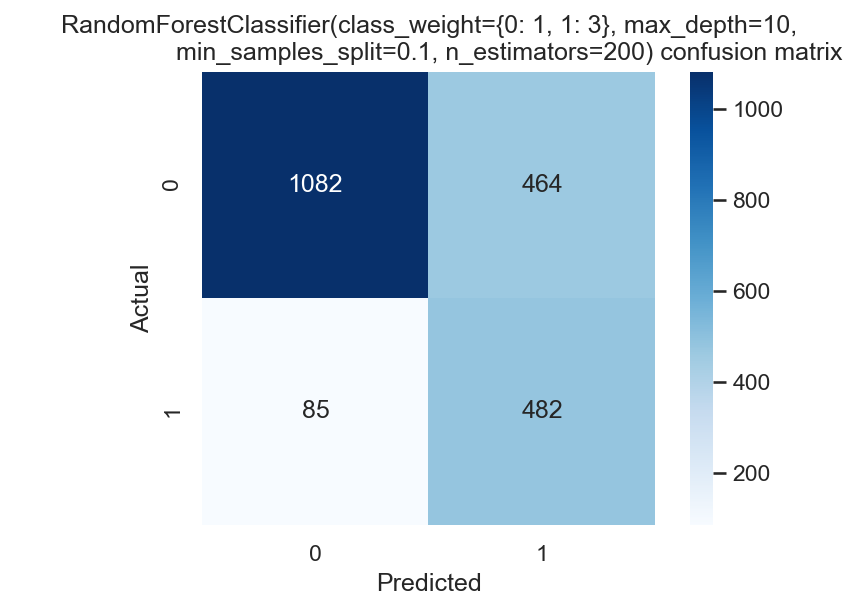

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1546
           1       0.51      0.85      0.64       567

    accuracy                           0.74      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.82      0.74      0.75      2113



In [1356]:
# print confusion matrix for best random forest model on test data
best_model_rf = gs_rf.best_estimator_
print(f'Random Forest Confusion Matrix - Test Data - Best Model {gs_rf.best_index_}')


eval_metrics(best_model_rf, X_test_3, y_test, y_hat_test3)

Model best F1 score 0.637 at prob decision threshold >= 0.499


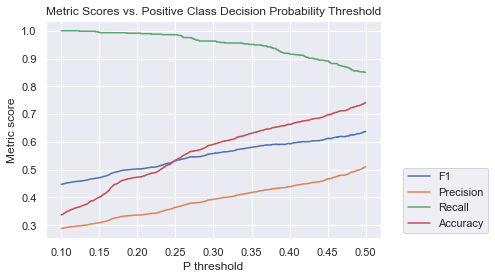

In [1357]:
decision_thresh(best_model_rf, X_test_3, y_test)

In [1358]:
rf_dt = 0.499

rf_predicted_proba = best_model_rf.predict_proba(X_test_3)
rf_pred = (rf_predicted_proba [:,1] >= rf_dt).astype('int')

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
score_pred('Random Forest', 'test', y_test, rf_pred)

[[1082  464]
 [  85  482]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1546
           1       0.51      0.85      0.64       567

    accuracy                           0.74      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.82      0.74      0.75      2113

Model Random Forest Predictions: AUC 0.77 | Accuracy 0.74 | Recall 0.85 | Precision 0.51 | F1 0.64


{'model': 'Random Forest',
 'data': 'test',
 'auc': 0.7749794086577182,
 'acc': 0.7401798390913393,
 'rec': 0.8500881834215167,
 'prec': 0.5095137420718816,
 'f1': 0.6371447455386648}

Logistic Regression Model AUC 0.775


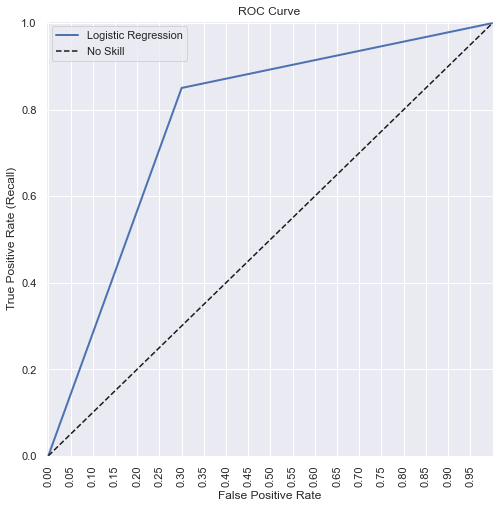

In [1359]:
# plot the ROC Area Under Curve for Random Forest
fpr2, tpr2, auc_thresholds2 = roc_curve(y_test, rf_pred)
print(f'Logistic Regression Model AUC {round(auc(fpr2, tpr2), 3)}') # AUC of ROC
plot_roc_curve(fpr2, tpr2, 'Logistic Regression')

## Gradient Boosted Trees

In [155]:
from xgboost import XGBClassifier

In [156]:
# create XGBoost classifier object using logistic objective
model_xg = XGBClassifier(objective='binary:logistic') 

In [161]:
param_grid_xg = {
    'reg_alpha':[0.1, 1, 10],
    'learning_rate': [0.01, 0.1], # step size for model iteration
    'max_depth': [4, 8], # max number of trees deep
    'n_estimators': [100, 200, 500], # number of trees to grow
    #'subsample': [0.6, 0.8] # ratio of the training used to grow each tree
}

In [162]:
# create gridsearchCV object for XGBoost
gs_xg = instantiate_grid(model_xg, param_grid_xg)

In [163]:
# execute the XGBoost gridsearchCV on training data
gs_xg.fit(X_train_3, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     miss...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8],
                         'n_estimators': [100, 200, 500],
                         'reg_alpha': [0.1, 1, 10]},

XGBoost Confusion Matrix - Training Data
Best Model Parameters: 23 <bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>


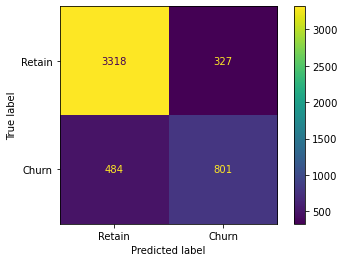

In [168]:
# print confusion matrix (train) for best model
best_model_xg = gs_xg.best_estimator_
print('XGBoost Confusion Matrix - Training Data')

plot_confusion_matrix(best_model_xg, X_train_3, y_train, display_labels=['Retain', 'Churn'])
print(f'Best Model Parameters: {gs_xg.best_index_} {gs_xg.best_estimator_.get_params}')

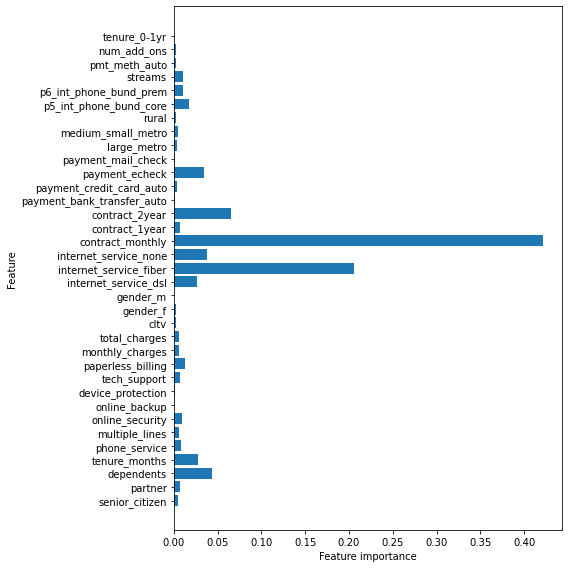

In [169]:
# plot Random Forest feature importance for best estimator
n_features = X_train_3.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), best_model_xg.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train_3.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [171]:
# compare xgboost best estimator metrics for Train vs Test data sets
print('Train Performance - XGBoost Model\n---------------------------------')
y_hat_train_3 = best_model_xg.predict(X_train_3)
scores_train_xg = score_pred('xg', 'train', y_train, y_hat_train_3)

print('\nTest Performance - XGBoost Model\n--------------------------------')
y_hat_test_3 = best_model_xg.predict(X_test_3)
scores_test_xg = score_pred('xg', 'test', y_test, y_hat_test_3)

Train Performance - XGBoost Model
---------------------------------
Model xg Predictions: AUC 0.77 | Accuracy 0.84 | Recall 0.62 | Precision 0.71 | F1 0.66

Test Performance - XGBoost Model
--------------------------------
Model xg Predictions: AUC 0.72 | Accuracy 0.8 | Recall 0.54 | Precision 0.67 | F1 0.6


Model best F1 score 0.654 at prob decision threshold >= 0.260


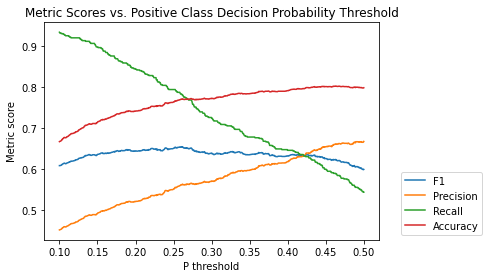

In [181]:
decision_thresh(best_model_xg, X_test_3, y_test)

In [182]:
xg_dt = 0.260

xg_predicted_proba = best_model_xg.predict_proba(X_test_3)
xg_pred = (xg_predicted_proba [:,1] >= xg_dt).astype('int')

print(confusion_matrix(y_test, xg_pred))
print(classification_report(y_test, xg_pred))
score_pred('XGBoost', 'test', y_test, xg_pred)

[[1171  358]
 [ 127  457]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1529
           1       0.56      0.78      0.65       584

    accuracy                           0.77      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.81      0.77      0.78      2113

Model XGBoost Predictions: AUC 0.77 | Accuracy 0.77 | Recall 0.78 | Precision 0.56 | F1 0.65


{'model': 'XGBoost',
 'data': 'test',
 'auc': 0.7741971429083383,
 'acc': 0.7704685281590156,
 'rec': 0.7825342465753424,
 'prec': 0.5607361963190184,
 'f1': 0.6533238027162259}

## Oversampling

In [207]:

!conda install -c conda-forge imbalanced-learn -y

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1



imbalanced-learn-0.7 | 97 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: | WARNING conda.core.path_actions:verify(962): Unable to create environments file. Path not writable.
  environment location: /Users/mariyagraff/.conda/environments.txt

done
Executing transaction: done


In [219]:
conda install imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38hecd8cb5_0        14.4 MB
    ------------------------------------------------------------
                                           Total:        14.4 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38h50d173~ --> pkgs/main::conda-4.11.0-py38hecd8cb5_0



conda-4.11.0         | 14.4 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: \ WARNING conda.core.path_actions:verify(962): Unable to create environments file. Path not writable.
  environment location: /Users/mariyagraff/.conda/environments.txt

done
Executing transaction: done


In [221]:
conda update conda

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    ------------------------------------------------------------
                                           Total:           8 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  _py-xgboost-mutex                             conda-forge --> pkgs/main



_py-xgboost-mutex-2. | 8 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: - WARNING conda.core.path_actions:verify(962): Unable to create environments file. Path not writable.
  environment location: /Users/mariyagraff/.conda/environments.txt

done
Executing transaction: done

Note: you may need to restart the kerne

In [222]:
conda update scikit-learn

Solving environment: \ 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.24.1=py38hb2f4e1b_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [223]:
#from imbalanced-learn import over_sampling
import imblearn.over_sampling
#import imblearn.over_sampling
#from imblearn import over_sampling
#from imblearn.over_sampling import SMOTE 

#from imblearn.over_sampling import RandomOverSampler

ImportError: cannot import name '_euclidean_distances' from 'sklearn.metrics.pairwise' (/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py)

In [218]:
import sklearn; print("Scikit-Learn", sklearn.version)

AttributeError: module 'sklearn' has no attribute 'version'

In [209]:
#import imblearn.over_sampling

#from imblearn import over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_tr == 1)
n_neg = np.sum(y_tr == 0)
ratio = {1 : n_pos * 2, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_train_lg_2, y_train_s = ROS.fit_resample(X_train_lg, y_train)


ImportError: cannot import name '_euclidean_distances' from 'sklearn.metrics.pairwise' (/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py)

In [ ]:
X_train_lg_2, y_train_s = ROS.fit_resample(X_train_lg, y_train)

gs_xg.fit(X_train_lg_2, y_train_s)

In [1235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [1238]:
model_weights(DecisionTreeClassifier, X_train_3, y_train, X_test_3, y_test)

Normal DecisionTreeClassifier() Test F1: 0.508, Test AUC: 0.664
Balanced DecisionTreeClassifier(class_weight='balanced') Test F1: 0.511, Test AUC: 0.666
3:1 class weights DecisionTreeClassifier(class_weight={0: 1, 1: 3}) Test F1: 0.511, Test AUC: 0.666


In [1276]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, class_weight='balanced')
AdaBoost = AdaBoostClassifier(base_estimator=tree, 
                              n_estimators = 500,
                            learning_rate=1)

boost_tree = AdaBoost.fit(X_train_3, y_train)

#y_pred_tree = boost_tree.predict(X_test_3)
#predictions_tree = accuracy_score(y_test, y_pred_tree)

Model best F1 score 0.642 at prob decision threshold >= 0.500


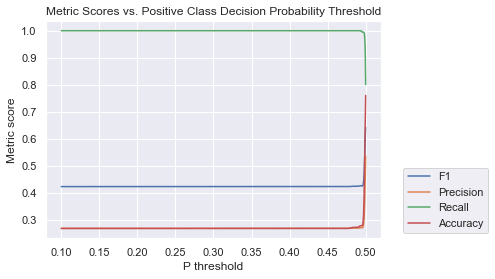

In [1277]:
decision_thresh(boost_tree, X_test_3, y_test)

In [1278]:
threshold_tree = 0.5

tree_predicted_proba = boost_tree.predict_proba(X_test_3)
tree_pred = (tree_predicted_proba [:,1] >= threshold_tree).astype('int')

accuracy_score(y_test, tree_pred)


0.7605300520586843

Accuracy score test 0.7605300520586843


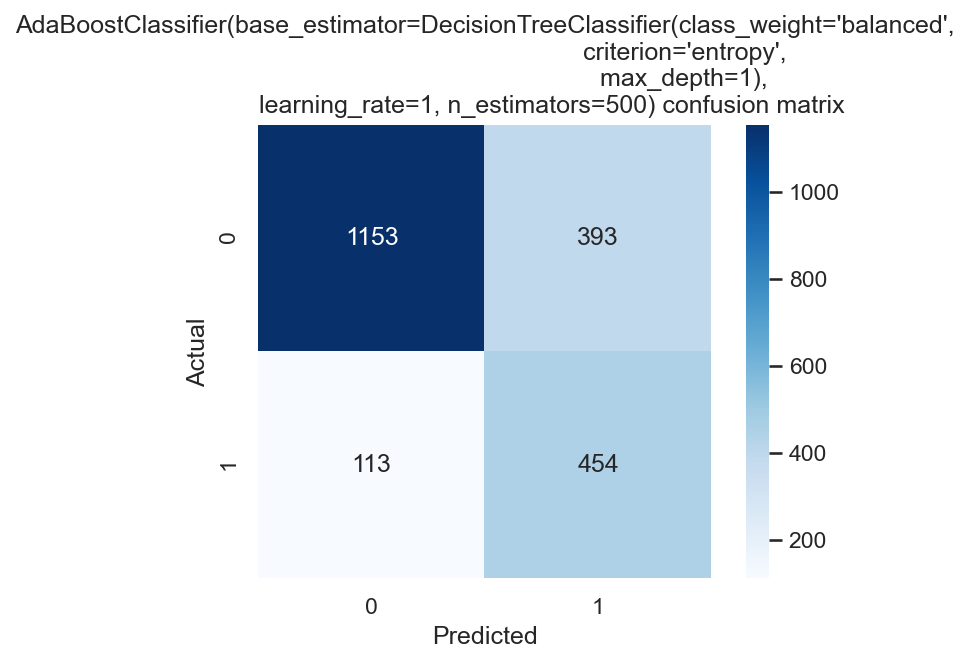

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1546
           1       0.54      0.80      0.64       567

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.76      0.77      2113



In [1256]:
eval_metrics(boost_tree, X_test_3, y_test, tree_pred)

In [1265]:
tree_results = pd.DataFrame({'Model': ['Decision Tree Adaboost'],
                    'Accuracy': [0.7605],
                    'Precision': [0.54],
                    'Recall': [0.80],
                            'F1': [0.64]})

#add new row to end of DataFrame
df_results = df_results.append(tree_results, ignore_index = True)


In [1266]:
df_results

Model  Accuracy  Precision  Recall    F1
0  Decision Tree Adaboost    0.7605       0.54     0.8  0.64

## Logistic Regression

In [1279]:
from sklearn.linear_model import LogisticRegression

In [1280]:
model_weights(LogisticRegression, X_train_3, y_train, X_test_3, y_test)

Normal LogisticRegression() Test F1: 0.626, Test AUC: 0.862
Balanced LogisticRegression(class_weight='balanced') Test F1: 0.645, Test AUC: 0.862
3:1 class weights LogisticRegression(class_weight={0: 1, 1: 3}) Test F1: 0.646, Test AUC: 0.862


In [ ]:
#3:1 class weight is the best

In [1289]:
logreg = LogisticRegression(penalty='l2', C=800, class_weight = {1 : 3, 0 : 1})

logreg_model = logreg.fit(X_train_3, y_train)

Model best F1 score 0.648 at prob decision threshold >= 0.498


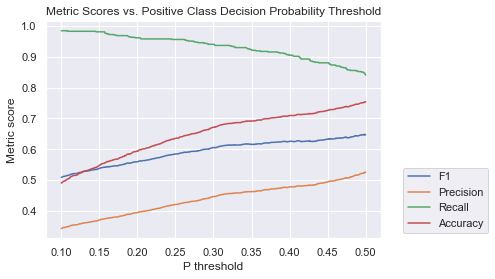

In [1290]:
decision_thresh(logreg_model, X_test_3, y_test)

In [1291]:
threshold_logreg = 0.498

logreg_predicted_proba = logreg_model.predict_proba(X_test_3)
logreg_pred = (logreg_predicted_proba [:,1] >= threshold_logreg).astype('int')

accuracy_score(y_test, logreg_pred)

0.751538097491718

Accuracy score test 0.7539044013251301


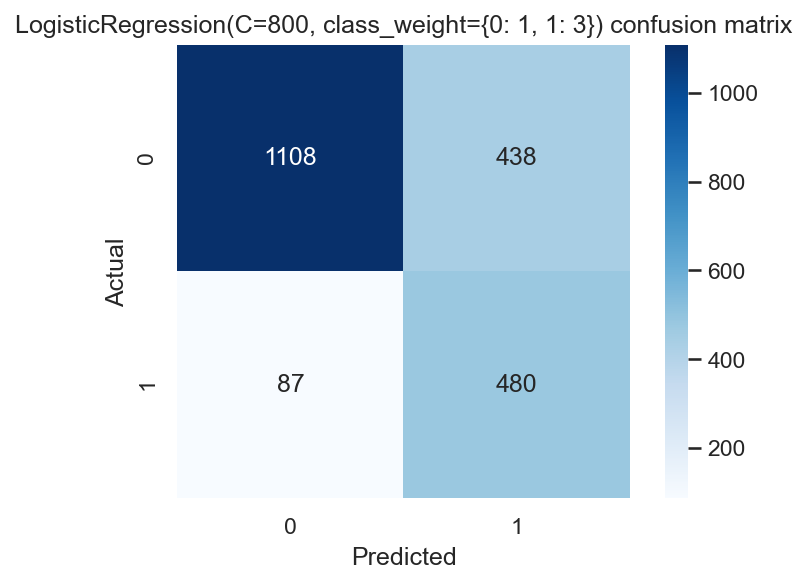

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1546
           1       0.52      0.85      0.65       567

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.76      2113



In [1292]:
eval_metrics(logreg_model, X_test_3, y_test, logreg_pred)

In [1293]:
logreg_results = pd.DataFrame({'Model': ['Logistic Regression'],
                    'Accuracy': [0.7539],
                    'Precision': [0.52],
                    'Recall': [0.85],
                            'F1': [0.65]})

#add new row to end of DataFrame
df_results = df_results.append(logreg_results, ignore_index = True)

In [1294]:
df_results

Model  Accuracy  Precision  Recall    F1
0  Decision Tree Adaboost    0.7605       0.54    0.80  0.64
1     Logistic Regression    0.7539       0.52    0.85  0.65

## FOREST 2

In [1208]:
forest2 = RandomForestClassifier(n_estimators=100, class_weight = {1 : 3, 0 : 1})

In [1210]:
forest2.fit(X_train_3, y_train)
forest2_pred = forest2.predict(X_test_3)

Model best F1 score 0.635 at prob decision threshold >= 0.270


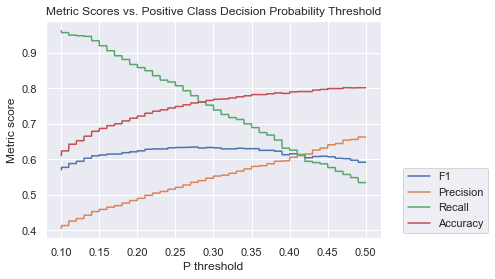

In [1211]:
def decision_thresh(model, X_test, y_test):
    X_val, y_val = X_test_3, y_test # explicitly calling this validation since we're using it for selection

    thresh_ps = np.linspace(.10,.50,1000)
    model_val_probs = forest2.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

    f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(y_val, model_val_labels))    
        prec_scores.append(precision_score(y_val, model_val_labels))
        rec_scores.append(recall_score(y_val, model_val_labels))
        acc_scores.append(accuracy_score(y_val, model_val_labels))
    
    plt.plot(thresh_ps, f1_scores)
    plt.plot(thresh_ps, prec_scores)
    plt.plot(thresh_ps, rec_scores)
    plt.plot(thresh_ps, acc_scores)

    plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
    plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
    plt.xlabel('P threshold')
    plt.ylabel('Metric score')

    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]

    print('Model best F1 score %.3f at prob decision threshold >= %.3f' 
          % (best_f1_score, best_thresh_p))

In [1228]:
def eval_metrics(model, X_test, y_test, y_pred):
    #confusion matrix
    
    print('Accuracy score test', model.score(X_test, y_test))
    c_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(dpi=150)
    sns.heatmap(c_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model} confusion matrix')
    plt.show()
    
    print(classification_report(y_test, y_pred))


In [1223]:
threshold = 0.27

predicted_proba = forest2.predict_proba(X_test_3)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)

In [1224]:
accuracy

0.7539044013251301

In [1225]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1546
           1       0.53      0.79      0.63       567

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.77      2113



In [1199]:
def eval_metrics(model, X_test, y_test, y_pred):
    #confusion matrix
    
    print('Accuracy score test', model.score(X_test, y_test))
    c_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(dpi=150)
    sns.heatmap(c_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model} confusion matrix')
    plt.show()
    
    print(classification_report(y_test, y_pred))


Accuracy score test 0.8045433033601515


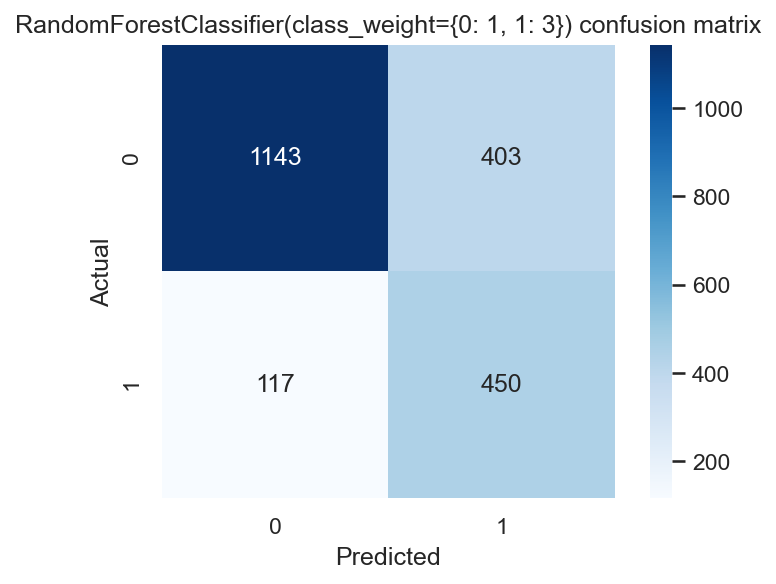

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1546
           1       0.53      0.79      0.63       567

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.77      2113



In [1226]:
eval_metrics(forest2, X_test_3, y_test, predicted)

In [ ]:
def class_report(y_test, pred):
#     print(pd.DataFrame(confusion_matrix(y_true, y_hat),
#                        columns=['Retain Pred', 'Churn Pred'], 
#                        index=['Retain Actual', 'Churn Actual']))
    print(classification_report(y_test, pred))

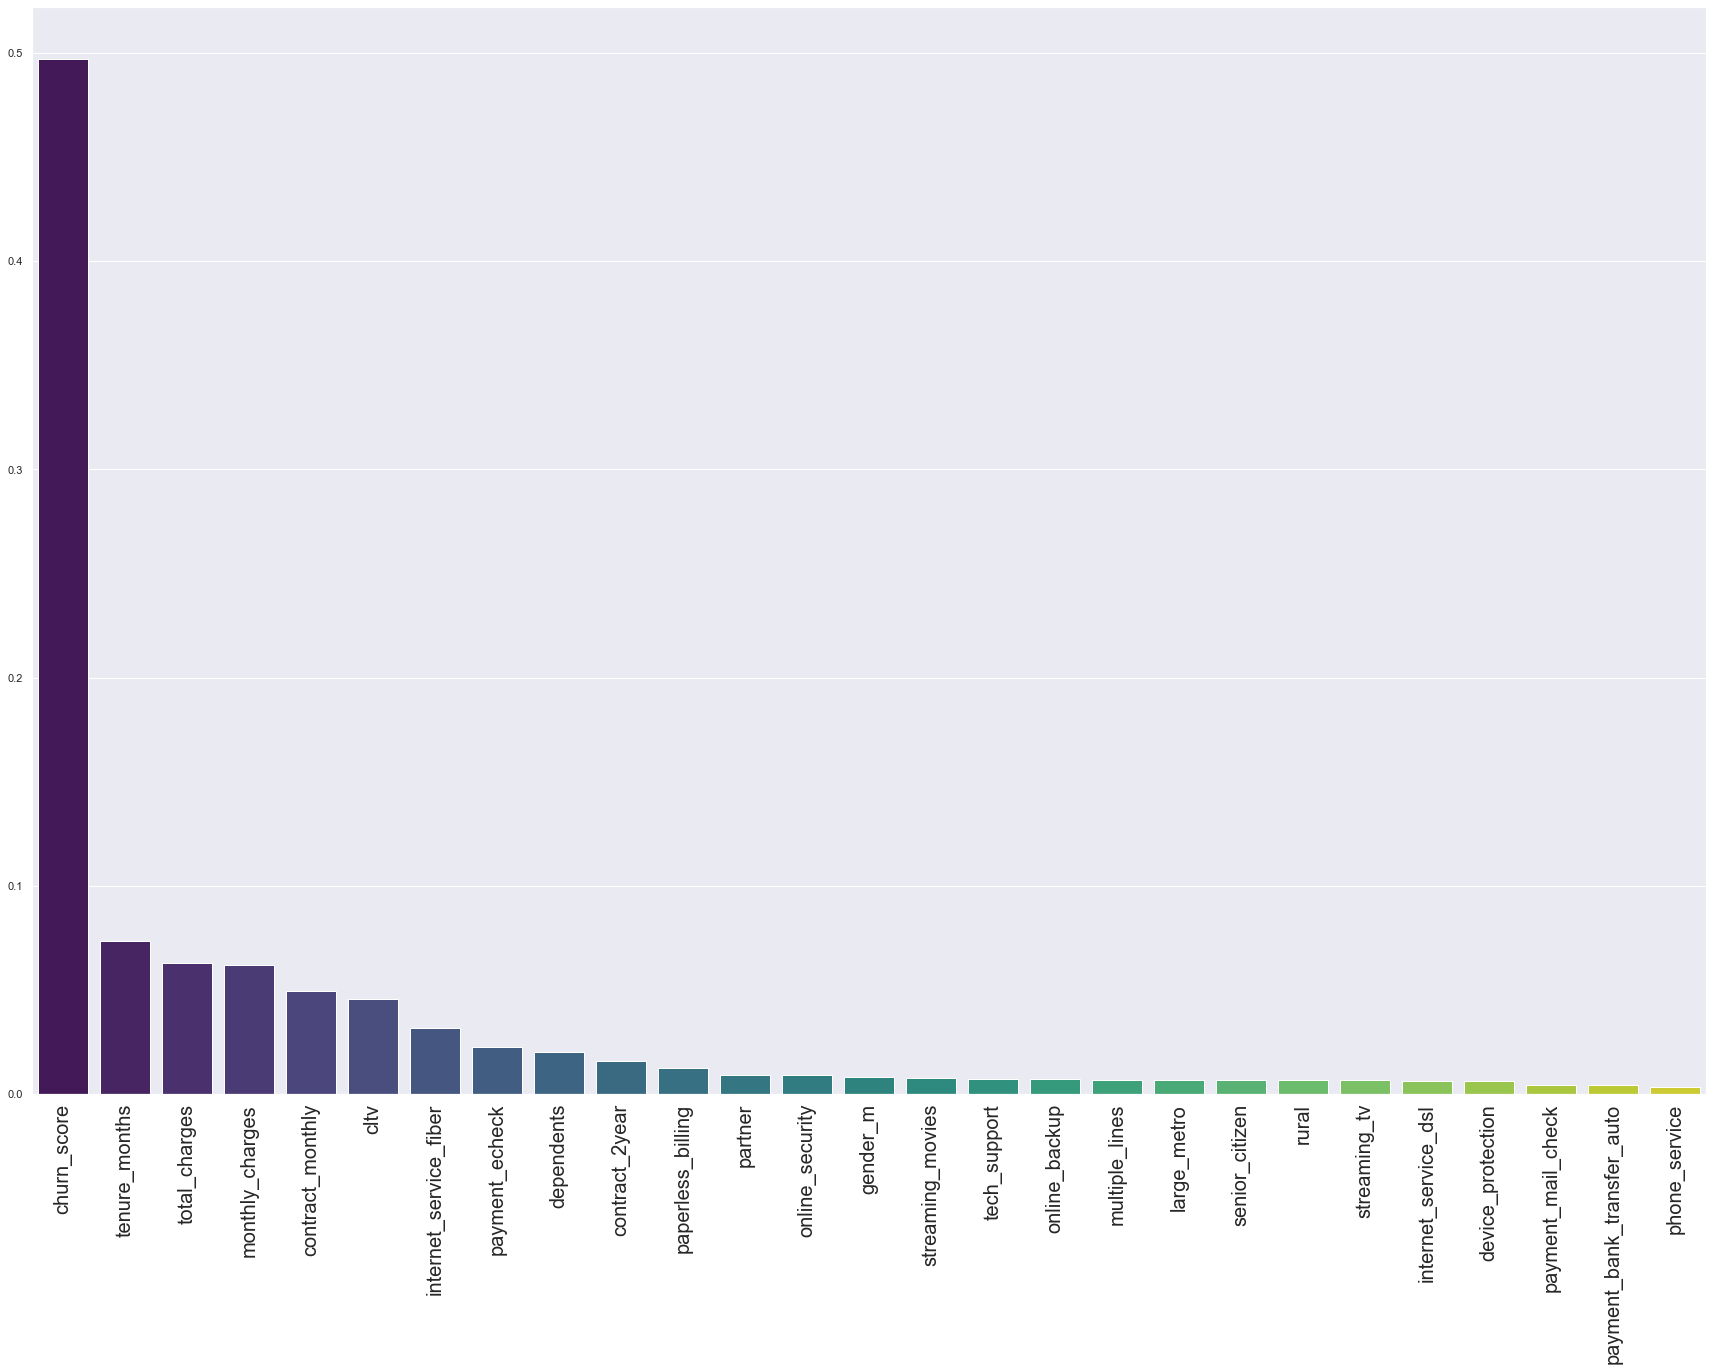

In [836]:
plt.figure(figsize=(30,20))
#g = sns.barplot(forest_importances, palette="flare")
#ax.set(xlabel='Churn Value', ylabel='Probability')
#plt.xticks(fontsize = 10)
#g.set_xticklabels(forest_importances.index)

forest_importances.sort_values(ascending=False, inplace=True)

sns.barplot(x = forest_importances.index, y = forest_importances, palette = 'viridis')
plt.xticks(fontsize = 20, rotation=90)
plt.show()
#plt.ylabel('')
